# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Süleyman Yolcu
## Student ID: 2210765016

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

## Missing values

In [2]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
housing_df.dropna(inplace = True)

In [4]:
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

- I have detected 207 rows containing null values and decided to drop them.

# Visualizing the features

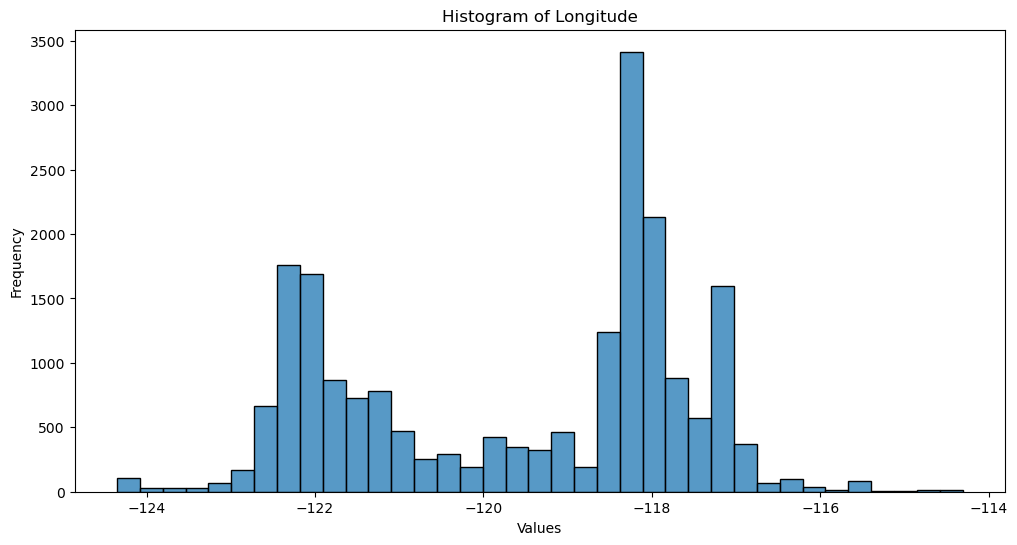

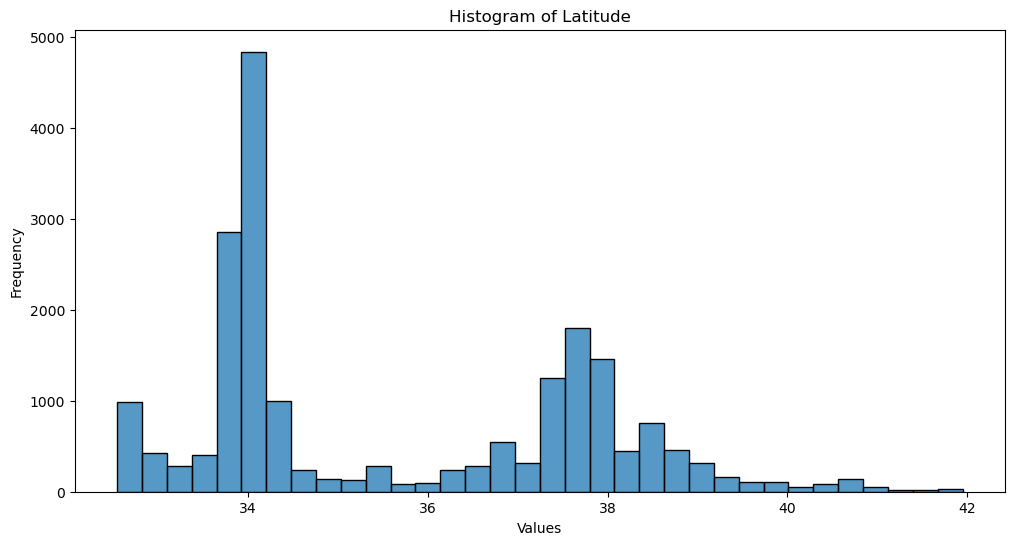

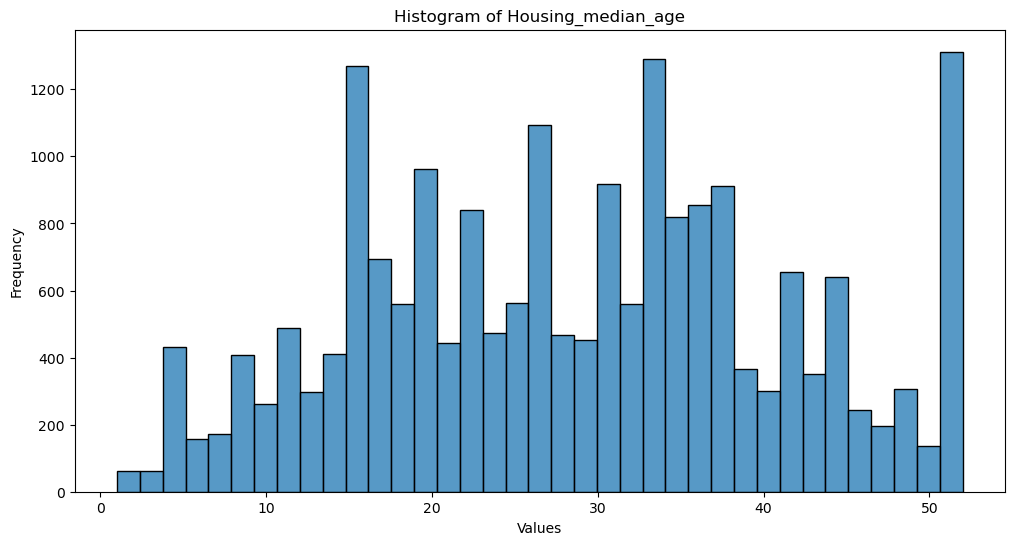

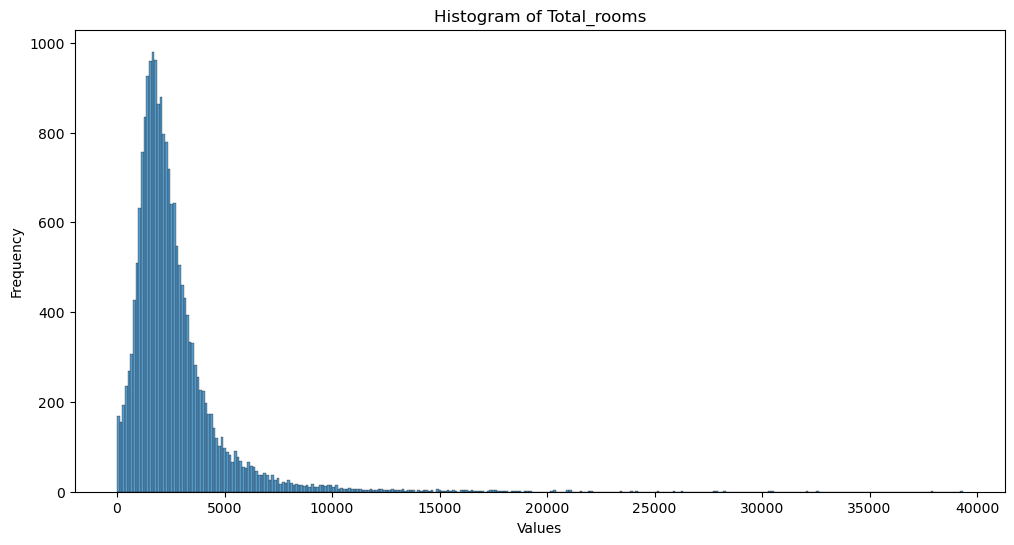

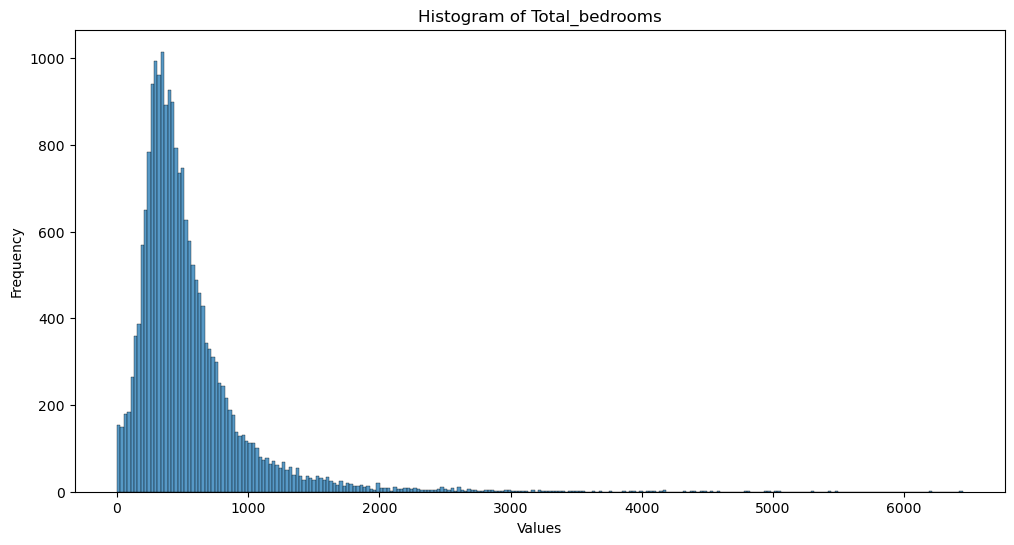

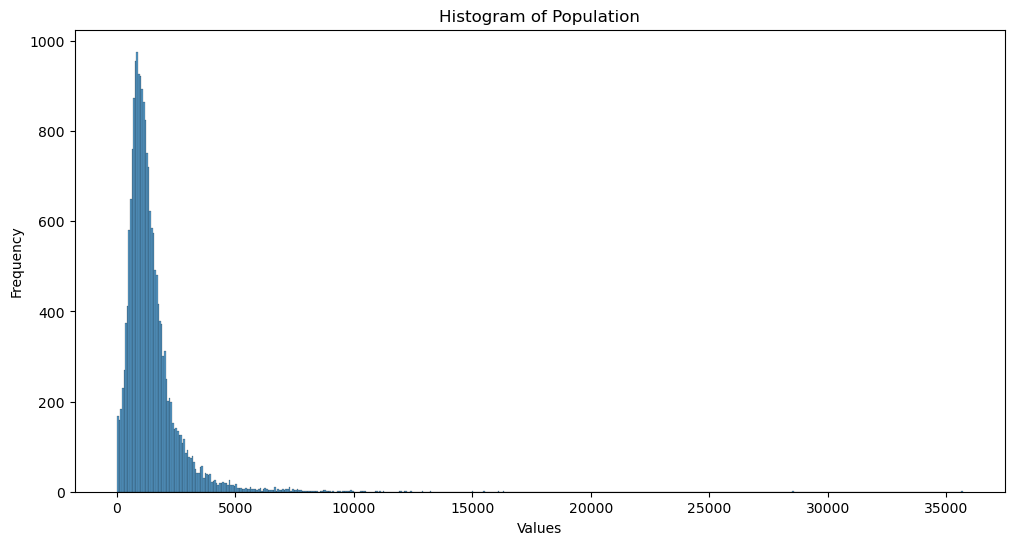

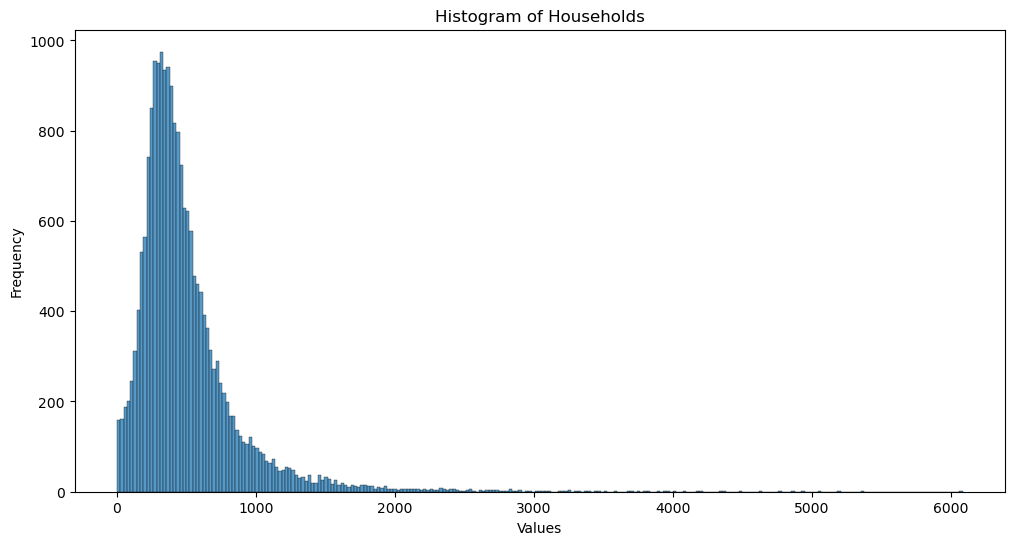

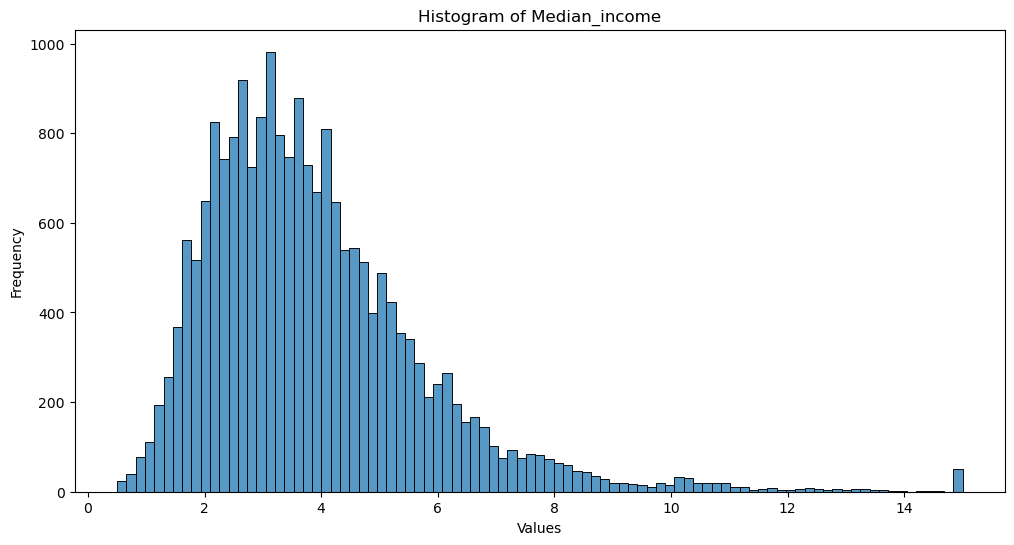

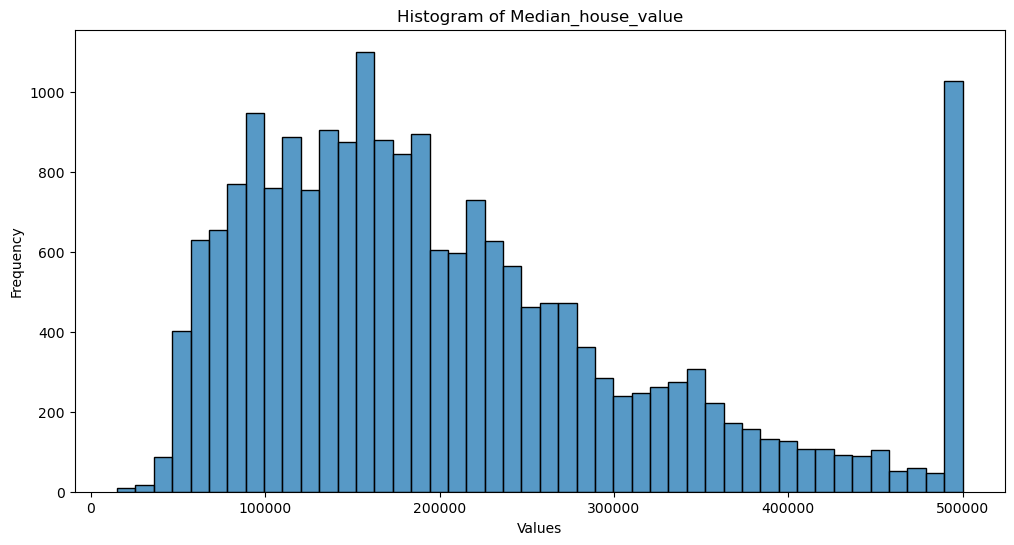

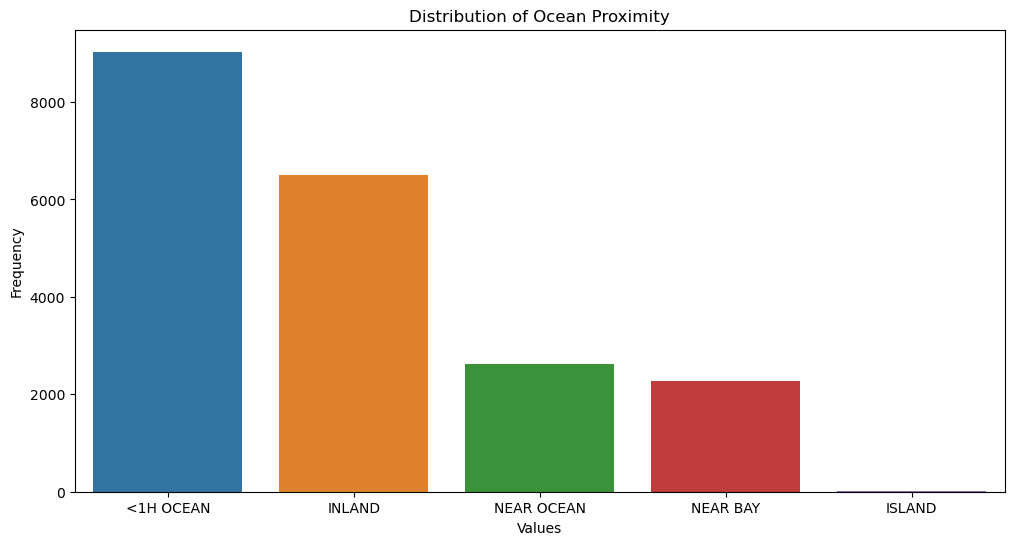

In [5]:
def plot_housing_data(housing_df):
    columns_to_plot = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income',
                       'median_house_value']

    for column in columns_to_plot:
        plt.figure(figsize=(12, 6))
        sns.histplot(housing_df[column])
        plt.title(f'Histogram of {column.capitalize()}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()

    counts = housing_df['ocean_proximity'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title('Distribution of Ocean Proximity')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()
plot_housing_data(housing_df)

## From the graphs above we can say :
- Longitude and latitude data looks like multimodal distributed but they are non-simetric.
- Housin median age data does not fit a particula distribution type.
- Total rooms, total bedrooms, population and household data is right
- Total bedrooms and household data looks like they have a longer tail.
- Median income data looks like normally distributed.
- Median house value also looks like normally distributed but ther are outliers at value 500000.
- The ranking of the ocean proximity data is like "<1H OCEAN" > "INLAND" > "NEAR OCEAN" > "NEAR BAY" > "ISLAND"
- The are a few houses which located on island

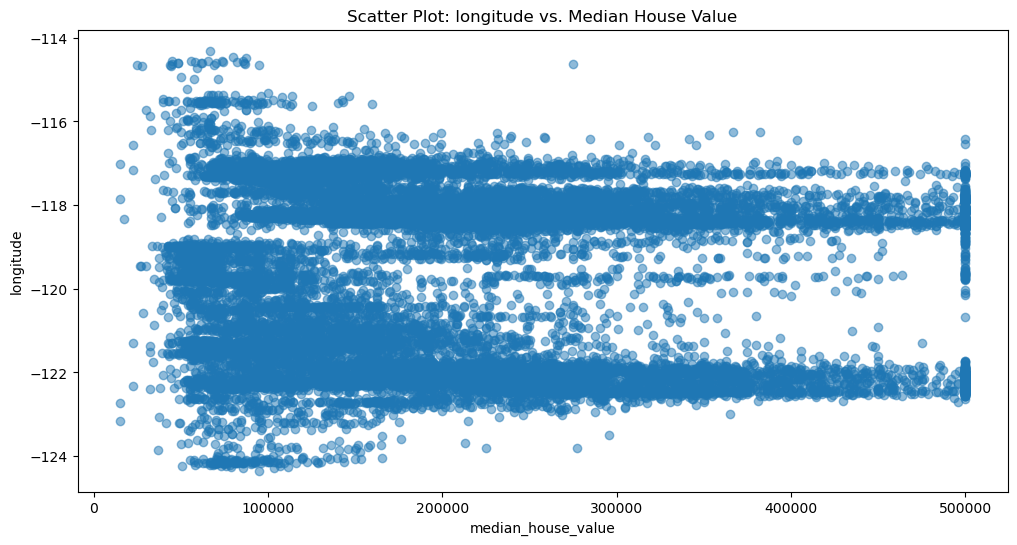

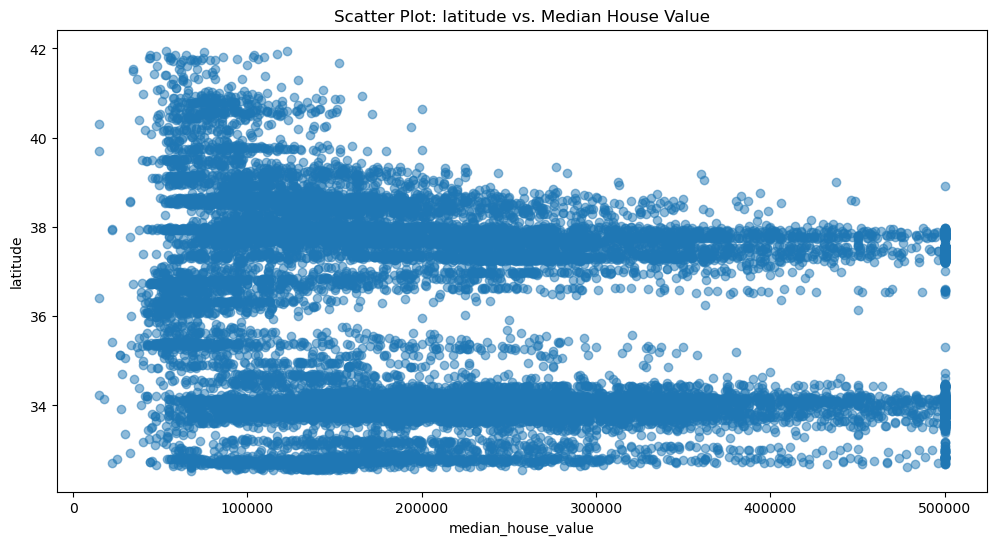

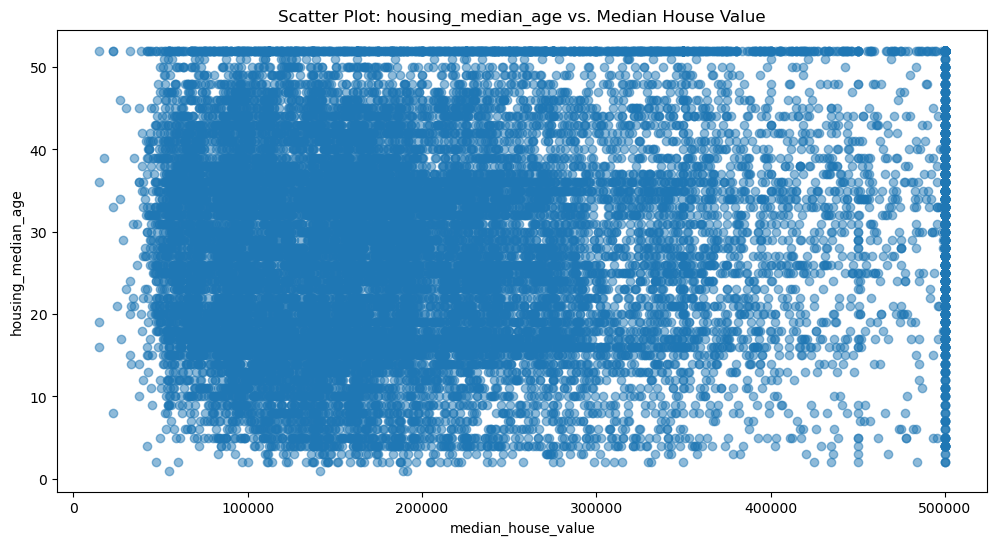

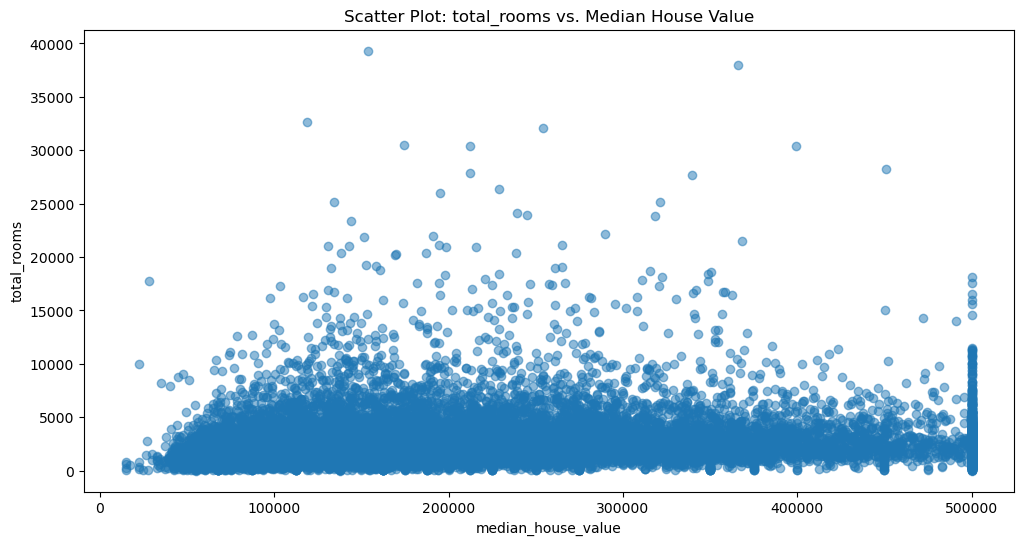

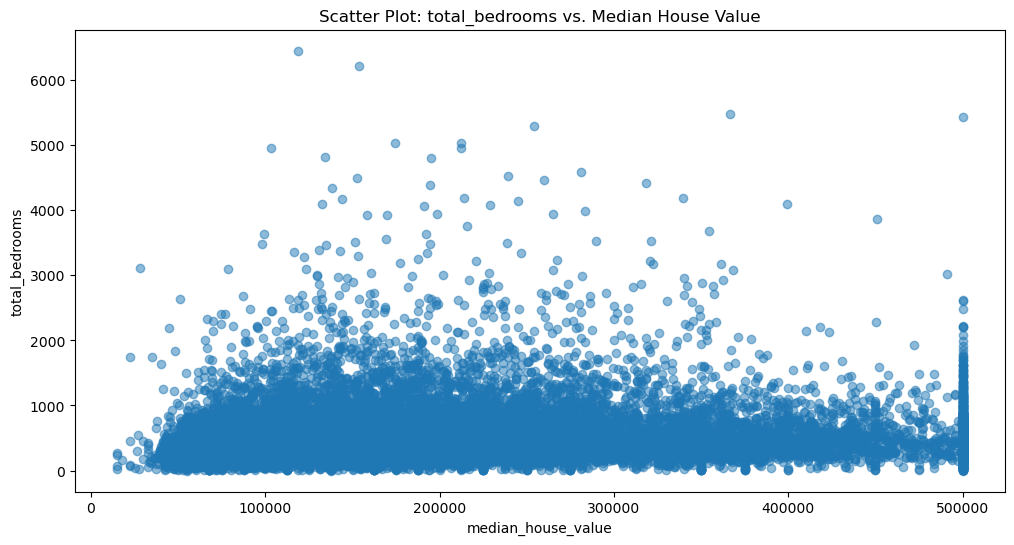

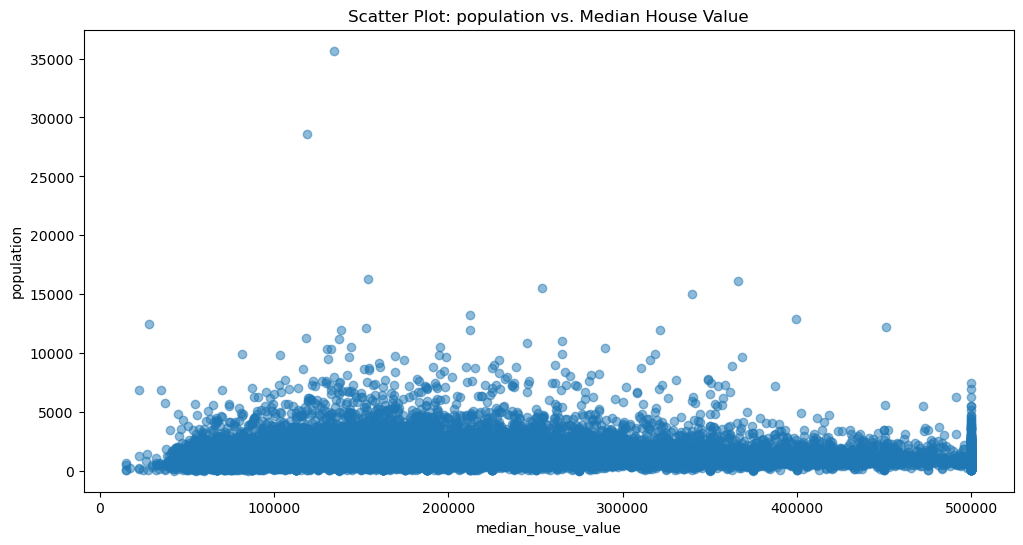

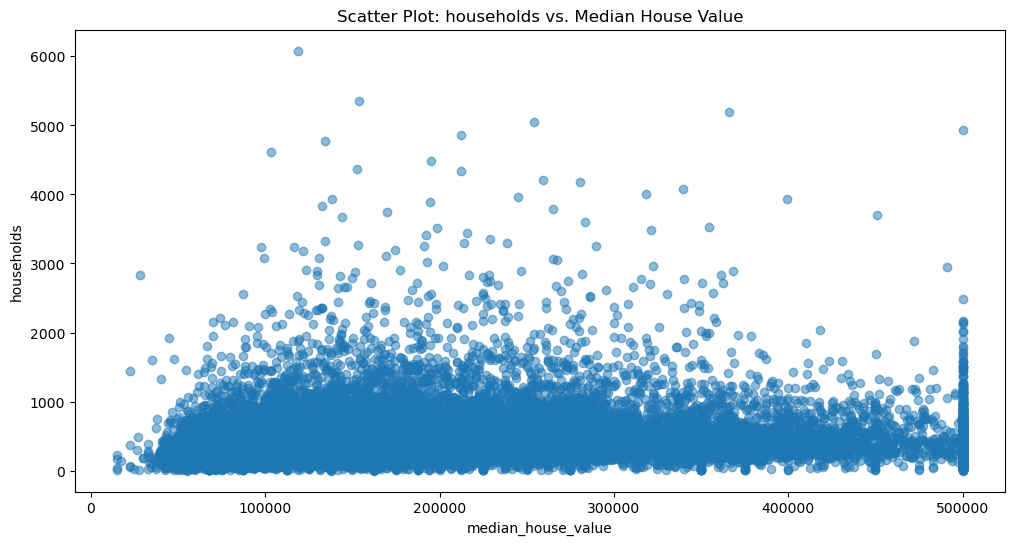

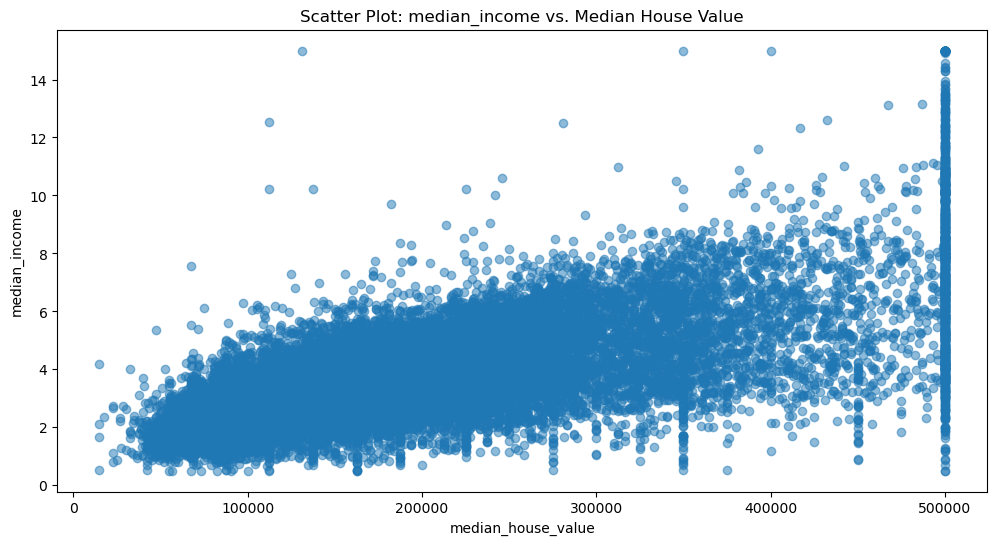

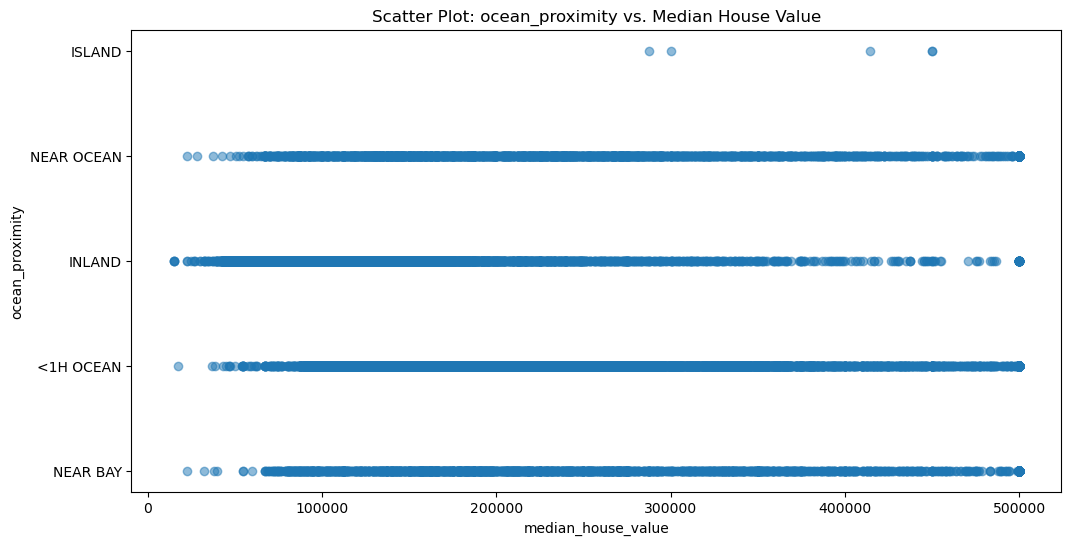

In [6]:
selected_features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity' ]

# Create scatter plots
for feature in selected_features:
    plt.figure(figsize=(12, 6))
    plt.scatter(x=housing_df['median_house_value'], y=housing_df[feature], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs. Median House Value')
    plt.xlabel('median_house_value')
    plt.ylabel(feature)
    plt.show()

## From the plots above we can say about the relationship between the target value:
- Longitude data seems concentraded around -118 and -124
- Latitude data seems concentraded around 34 and 38
- There is no correlation on median age, total rooms, total bedrooms and household data but we can say there are outliers.
- Median income has a positive correlation with the target value
- There are no houses on island below the median house value 300000

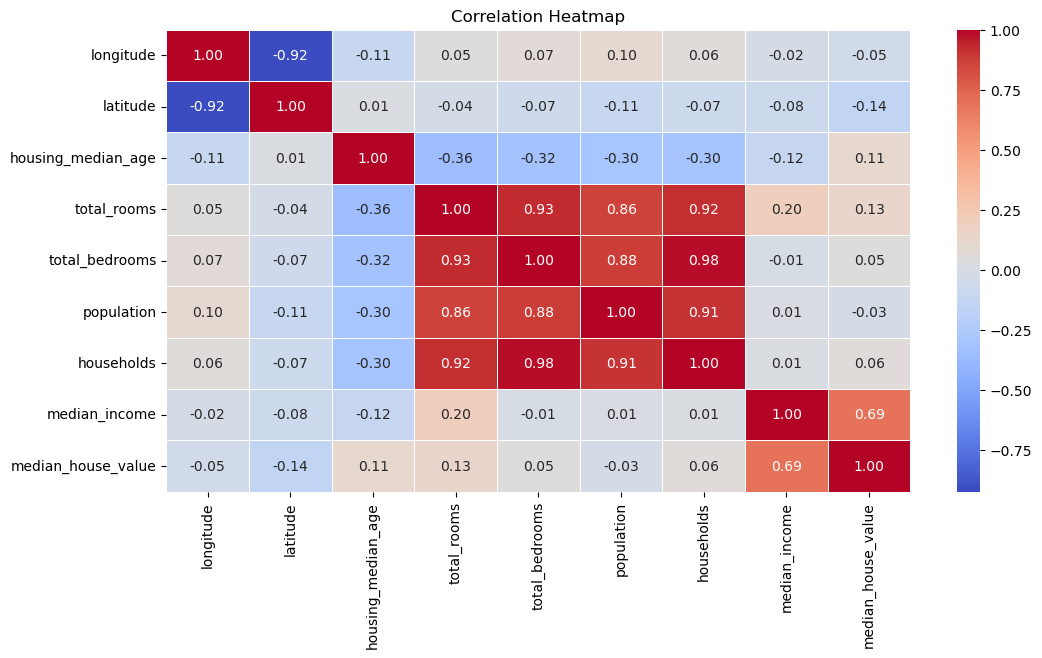

In [7]:
plt.figure(figsize=(12, 6)),
numeric_columns = housing_df.select_dtypes(include=[float, int]).columns
correlation_matrix = housing_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

- ## In the heatmap, a noticeable positive correlation is evident among the variables total_rooms, total_bedrooms, population, and households.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [8]:
# Function to create a checkpoint
def checkpoint(dataframe, filename):
    dataframe.to_csv(f"{filename}.csv", index=False)
    print(f"Checkpoint '{filename}' created.")

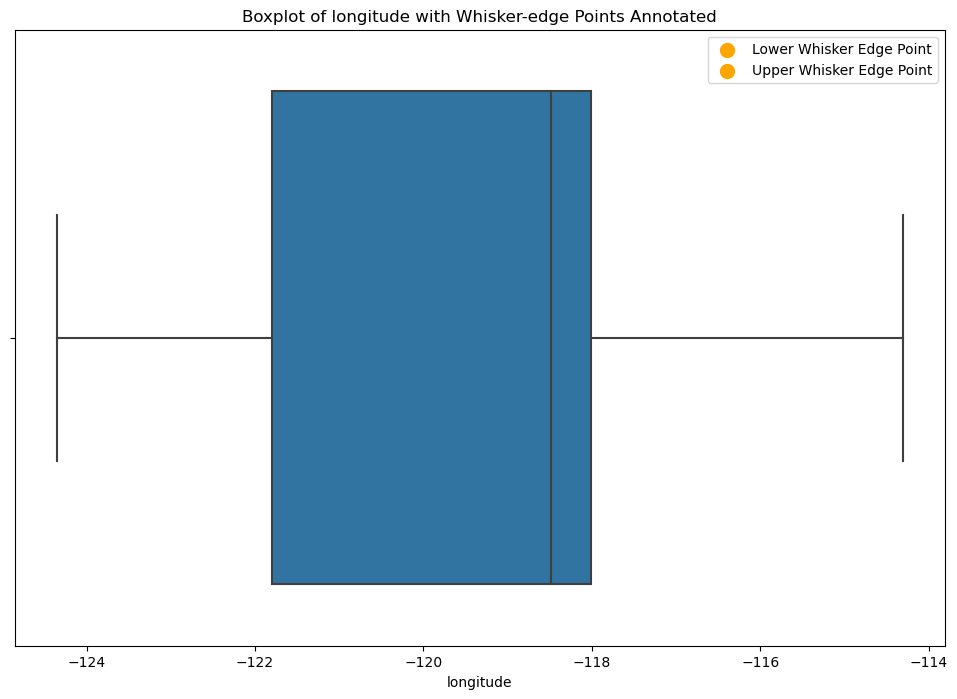

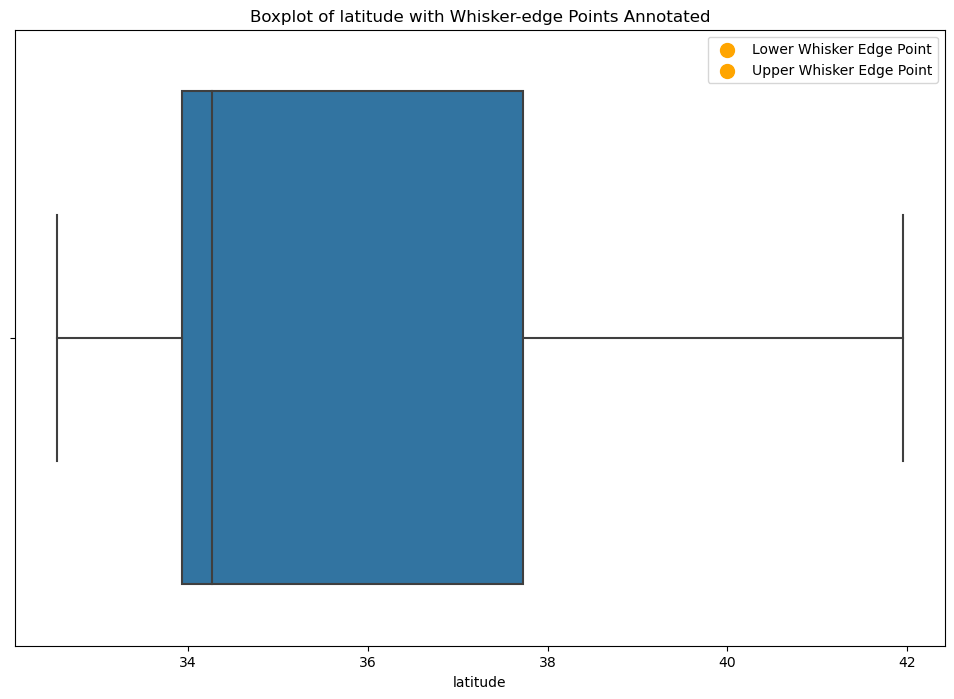

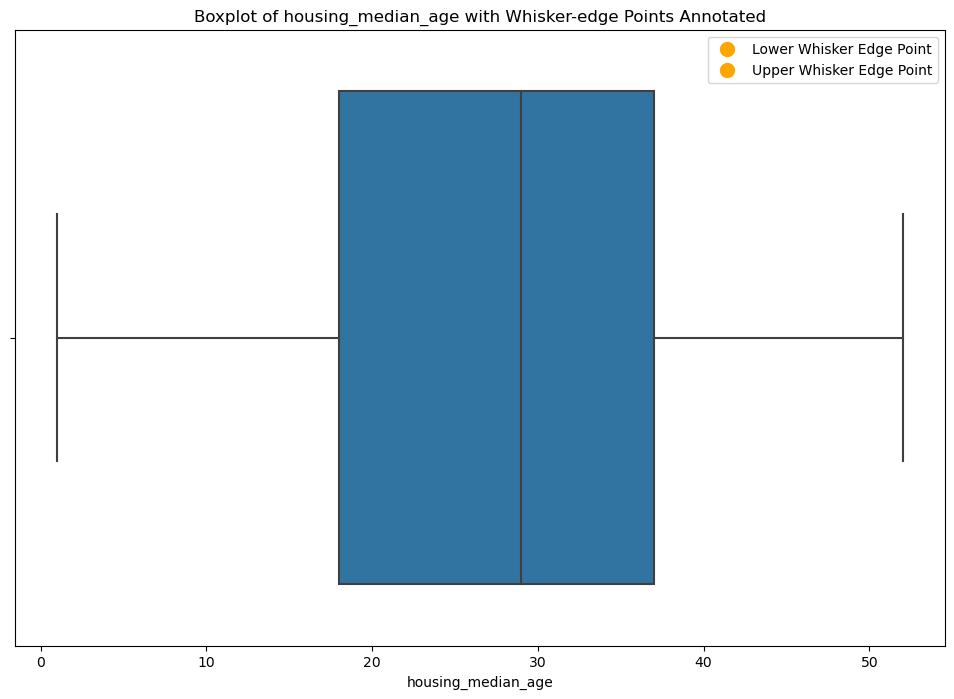

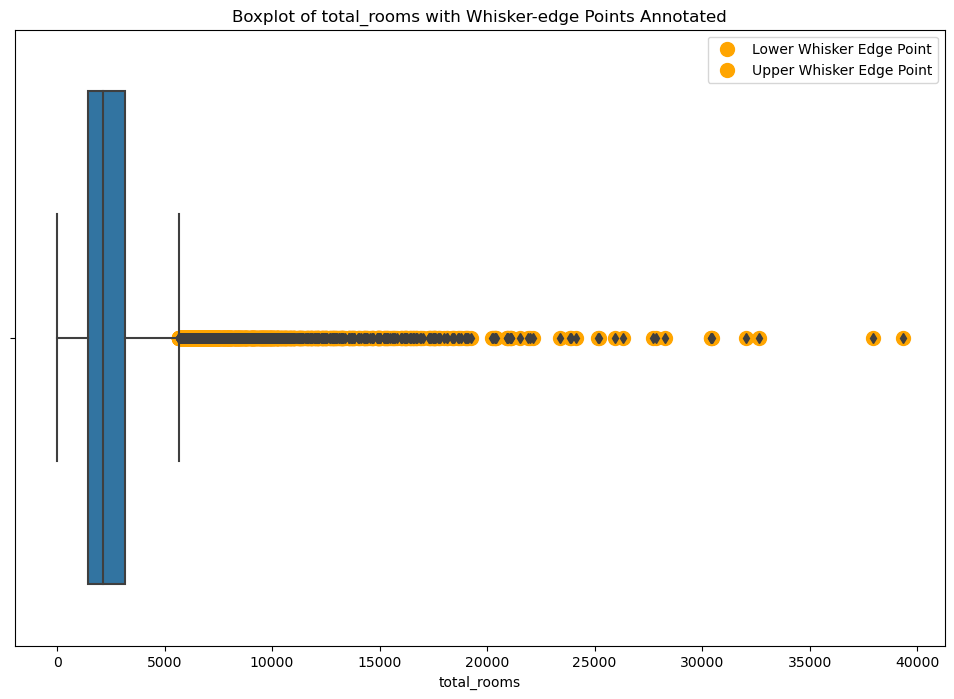

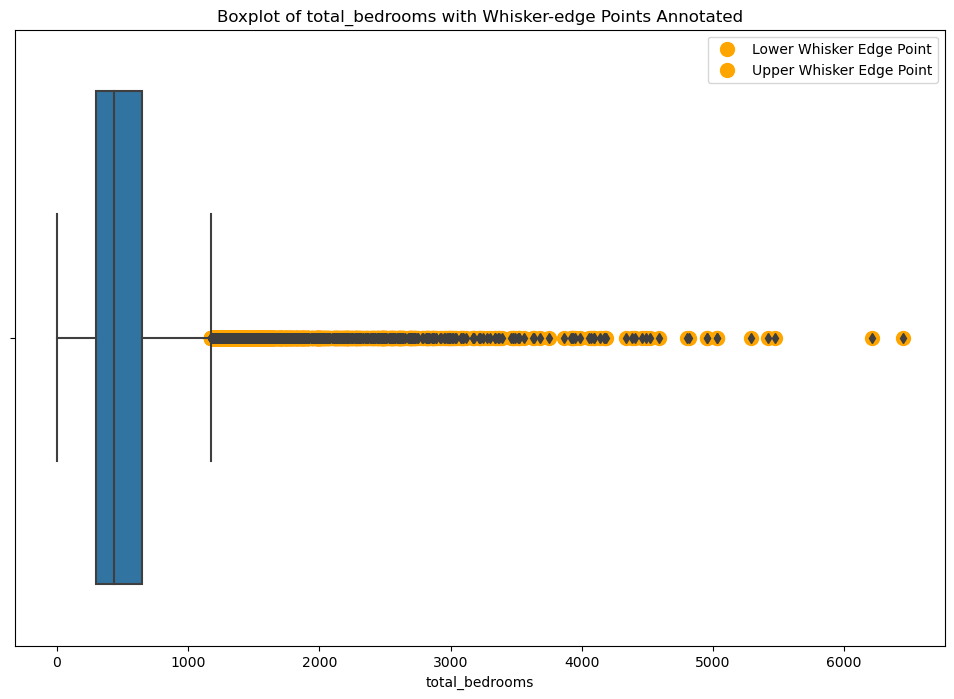

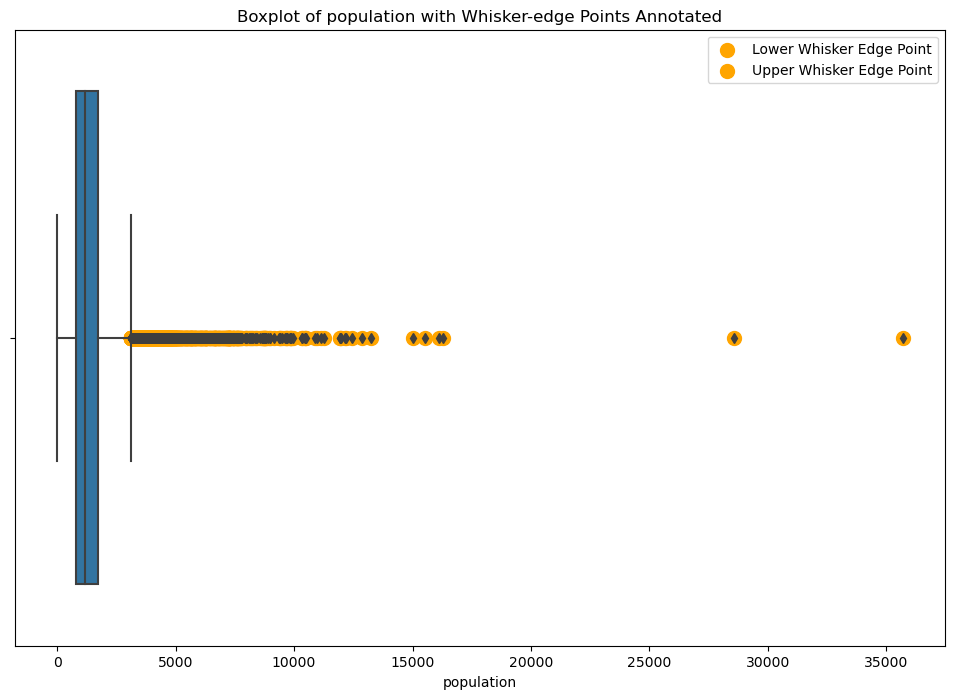

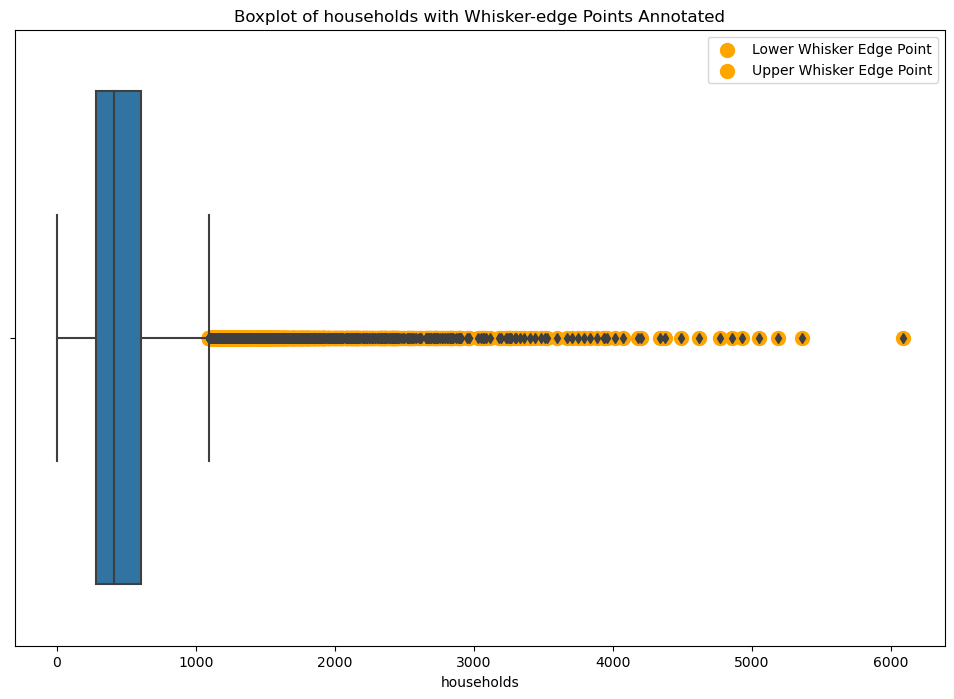

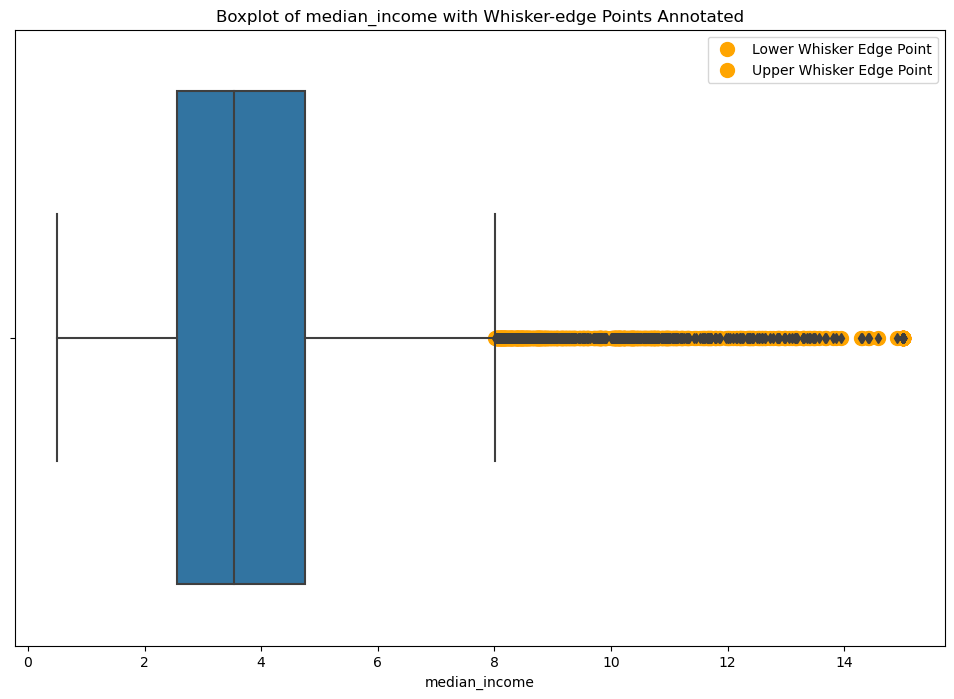

In [9]:
# Select numerical features for outlier detection
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Combine numerical features with the target variable for plotting
outlier_detection_data = pd.concat([housing_df[numerical_features], housing_df['median_house_value']], axis=1)

# Calculate quartiles and IQR for each numerical feature
Q1 = outlier_detection_data.quantile(0.25)
Q3 = outlier_detection_data.quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for defining outliers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Initialize an empty list to store outlier information
outlier_info = []

# Iterate through numerical features to identify and store outliers
for feature in numerical_features:
    lower_whisker_point = outlier_detection_data[outlier_detection_data[feature] < lower_whisker[feature]][feature]
    upper_whisker_point = outlier_detection_data[outlier_detection_data[feature] > upper_whisker[feature]][feature]
    outliers = pd.concat([lower_whisker_point, upper_whisker_point])
    
    # Append outlier information as a dictionary to the list
    outlier_info.append({'Feature': feature, 'Lower_Whisker': lower_whisker[feature],
                         'Upper_Whisker': upper_whisker[feature], 'Outliers': outliers.tolist()})

    # Create a boxplot for each feature with whisker-edge points annotated
    plt.figure(figsize=(12, 8))
    boxplot = sns.boxplot(x=outlier_detection_data[feature], whis=1.5)
    plt.scatter(lower_whisker_point, [0] * len(lower_whisker_point), color='orange', s=100, label='Lower Whisker Edge Point')
    plt.scatter(upper_whisker_point, [0] * len(upper_whisker_point), color='orange', s=100, label='Upper Whisker Edge Point')
    plt.legend()
    plt.title(f'Boxplot of {feature} with Whisker-edge Points Annotated')
    plt.xlabel(feature)
    plt.show()

# Convert the list of dictionaries to a DataFrame
outlier_info = pd.DataFrame(outlier_info)


#### The IQR Method

IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

- **Q1** represents the 25th percentile of the data.
- **Q2** represents the 50th percentile of the data.
- **Q3** represents the 75th percentile of the data.

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

##### Why the IQR Method
- The IQR method is based on the distribution of the median, which makes it robust against extreme values. Since it uses the middle 50% of the data, it's less affected by the skewness or distribution of the data.

- It doesn't assume a specific distribution for the data, making it suitable for a wide range of datasets.

- The data is not normally distributed hence IQR method is preferred due to its robustness.

#### Understanding boxplots
**Box (Interquartile Range, IQR):**
- The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The box is divided into two parts by the median.

**Whiskers:**
- Whiskers extend from the box to the minimum and maximum values within a certain range. The length of the whiskers is typically 1.5 times the IQR. Any data points beyond the whiskers are considered outliers.

**Median (Q2):**
- The line inside the box represents the median (Q2), which is the middle value when the data is sorted.

**Outliers:**
- Individual data points beyond the whiskers are considered outliers. They are plotted individually.

**Minimum and Maximum:**
- The ends of the whiskers represent the minimum and maximum values within the 1.5 times IQR range.

#### How to interpret 
- Central Tendency: Median line position indicates the central tendency of the data. If the median is closer to the bottom of the box, the data is skewed to the lower values. If it's closer to the top, the data is skewed to the higher values.

- Spread: A longer box indicates a larger spread of data, while a shorter box suggests a smaller spread.

- Symmetry: A symmetrical box suggests that the data is evenly distributed. If it's asymmetrical, the data is skewed.

- Outliers: Outliers can provide insights into extreme values in the dataset.

- Range: The range between the minimum and maximum values gives you an idea of the overall spread of the data.

In [10]:
outlier_info['Total Outlier Number '] = outlier_info['Outliers'].apply(lambda x: len(x))
display(outlier_info)

,Feature,Lower_Whisker,Upper_Whisker,Outliers,Total Outlier Number
0,longitude,-127.48500,-112.32500,[],0
1,latitude,28.24500,43.40500,[],0
2,housing_median_age,-10.50000,65.50000,[],0
3,total_rooms,-1089.50000,5682.50000,"[7099.0, 5806.0, 5871.0, 5963.0, 12842.0, 7355...",1290
4,total_bedrooms,-230.50000,1173.50000,"[2477.0, 1331.0, 1270.0, 1414.0, 1603.0, 1914....",1271
5,population,-615.50000,3124.50000,"[3469.0, 4367.0, 4985.0, 3337.0, 3276.0, 3668....",1190
6,households,-206.00000,1090.00000,"[1138.0, 2323.0, 1180.0, 1250.0, 1250.0, 1497....",1210
7,median_income,-0.70675,8.01445,"[8.3252, 8.3014, 11.6017, 8.2049, 8.401, 8.317...",670


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

In [11]:
def plot_distribution(housing_df):
    columns_to_plot = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income',]

    for column in columns_to_plot:
        plt.figure(figsize=(12, 6))
        sns.histplot(housing_df[column])
        plt.title(f'Histogram of {column.capitalize()}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()


Checkpoint 'original' created.


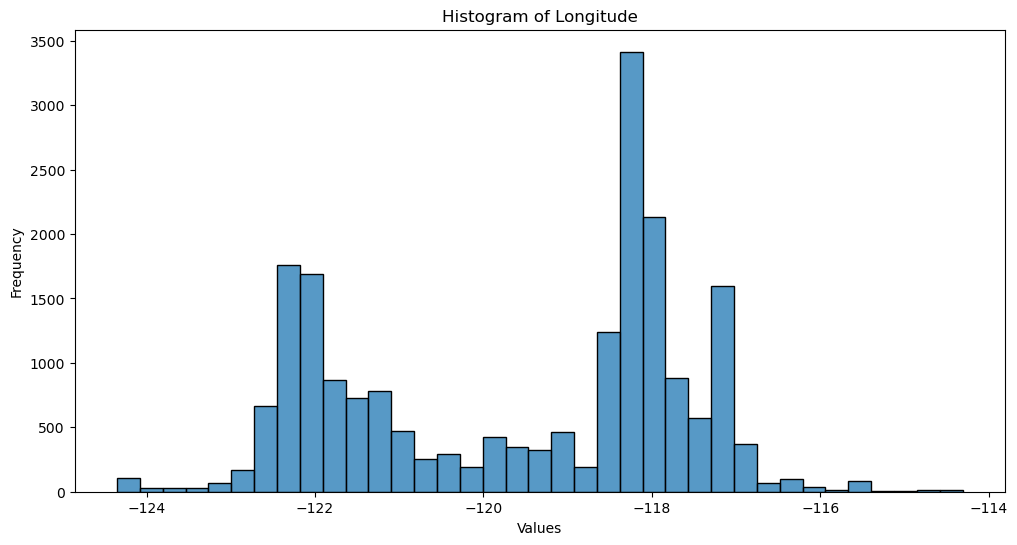

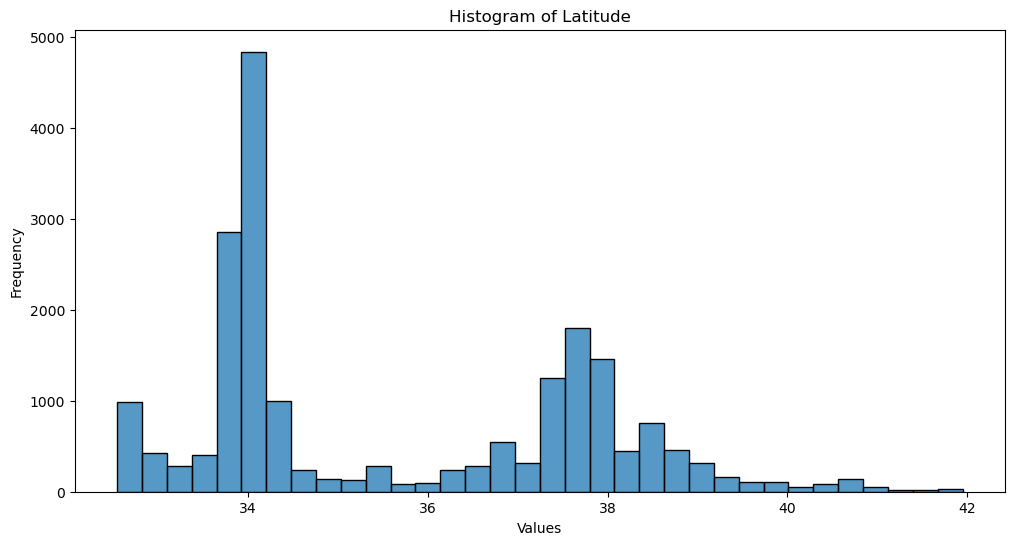

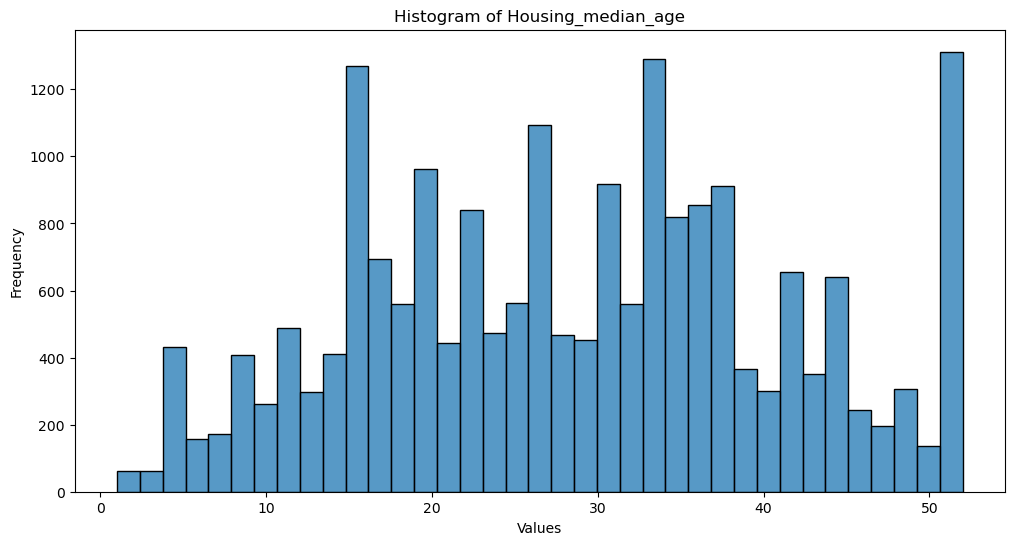

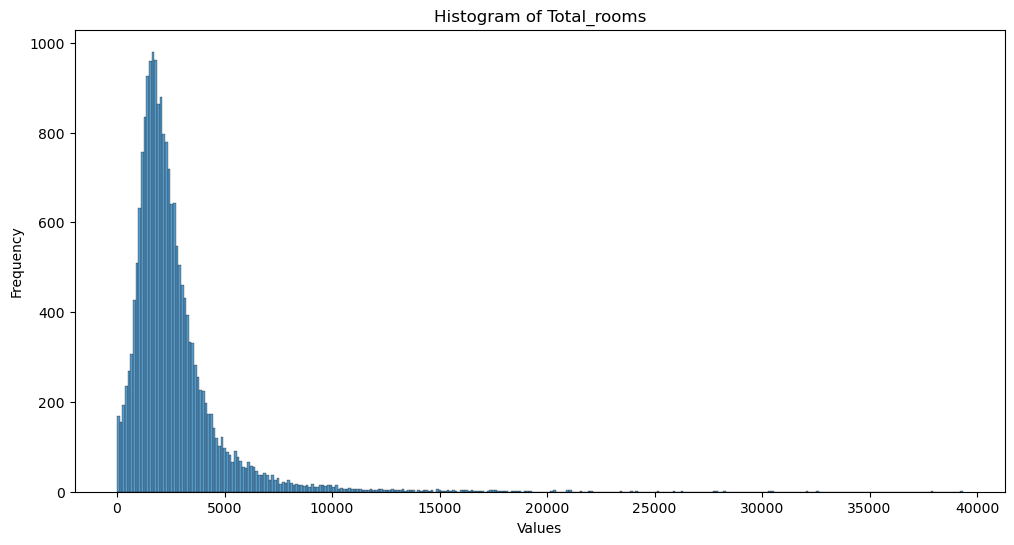

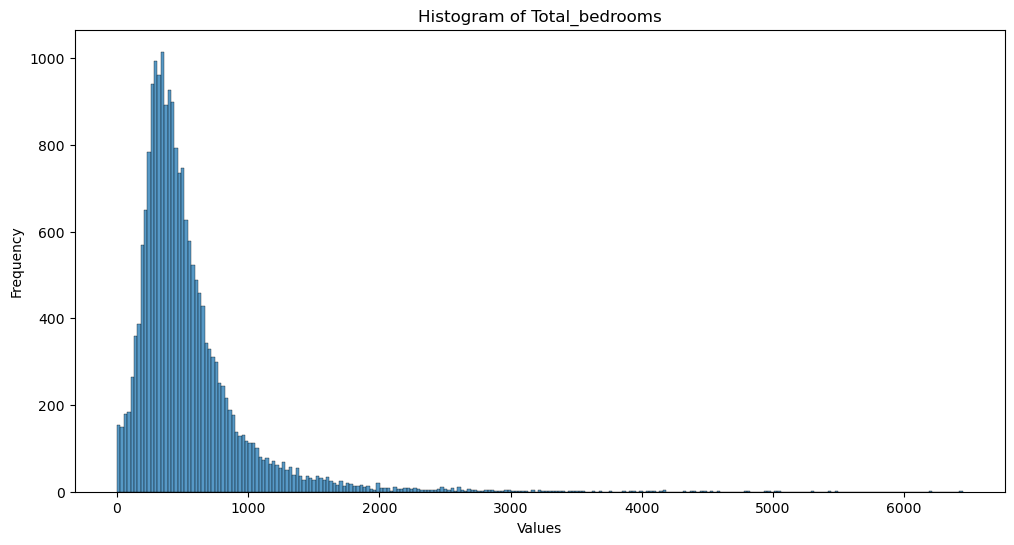

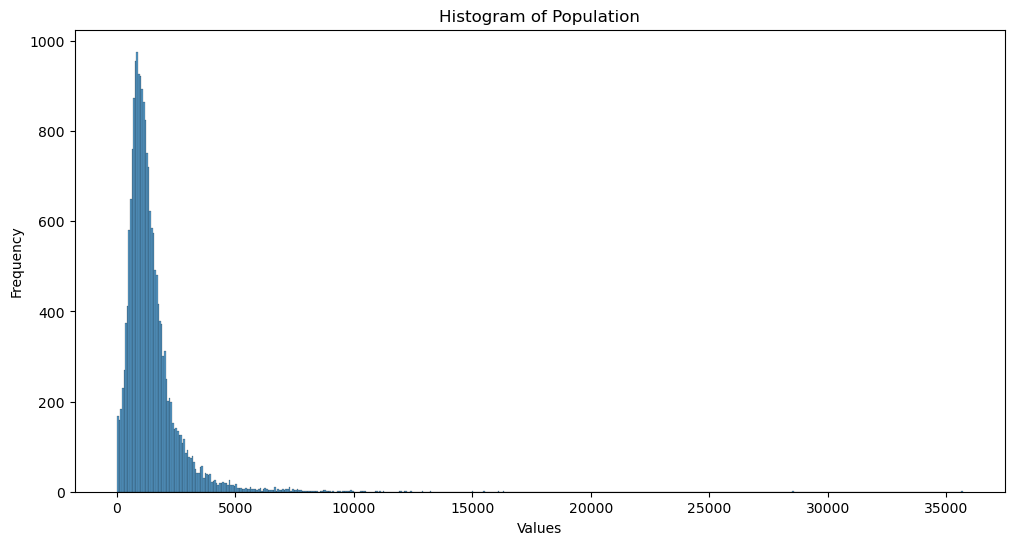

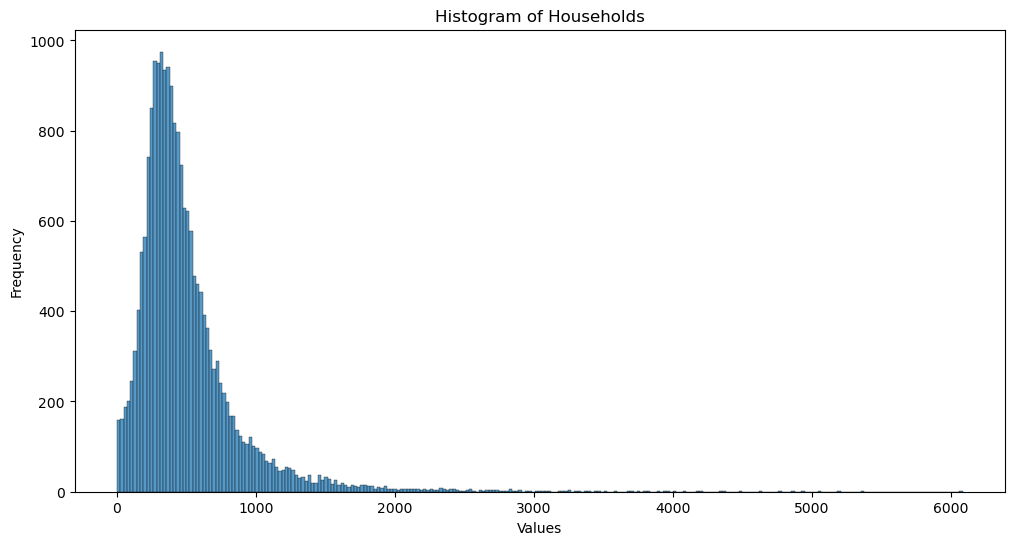

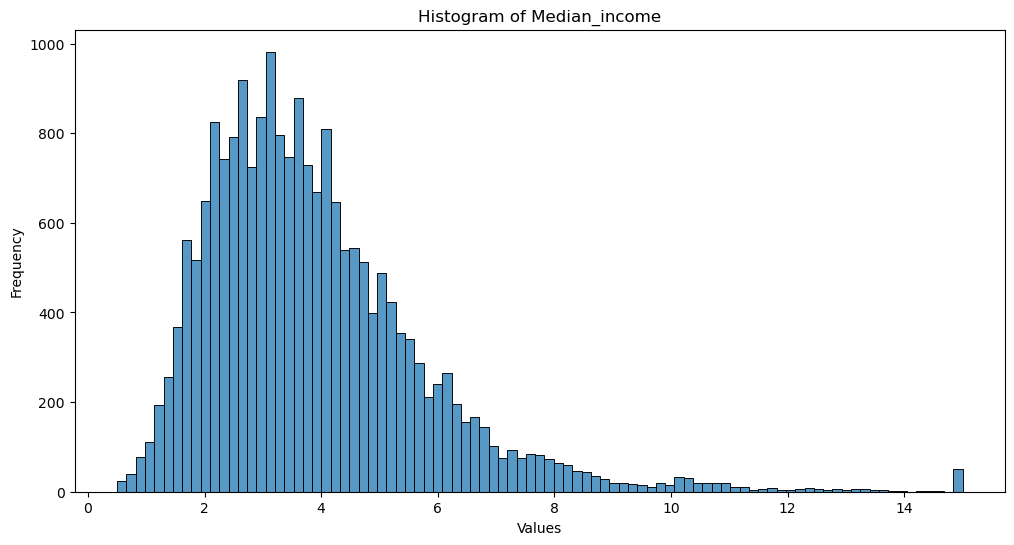

In [12]:
# Keep the dataset as is
checkpoint(housing_df,'original')
plot_distribution(housing_df)

Checkpoint 'outlier_removed' created.


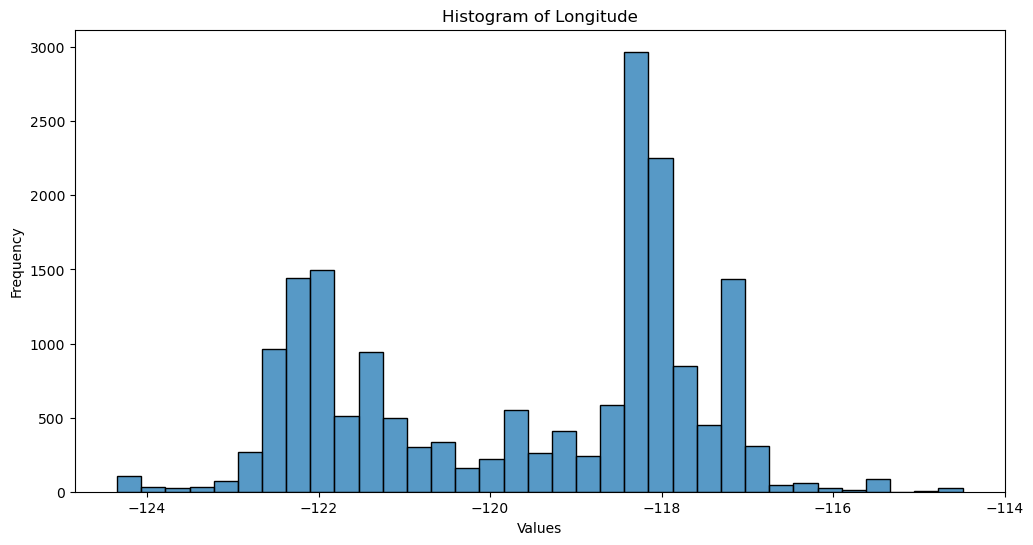

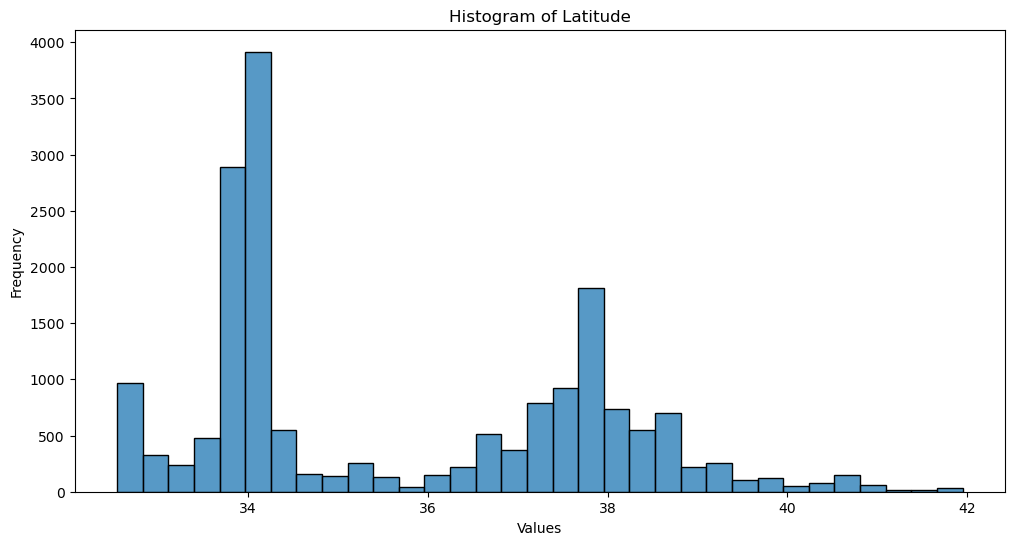

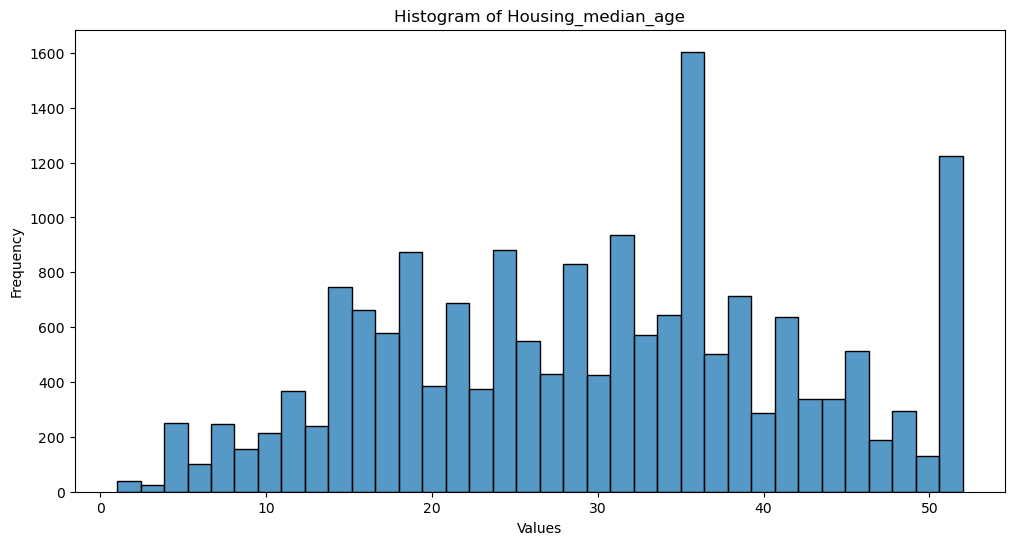

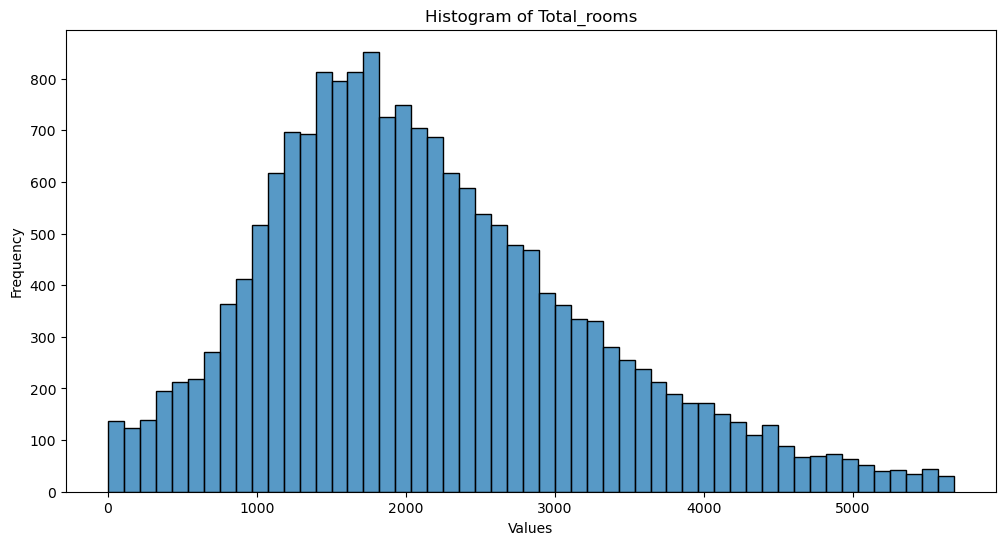

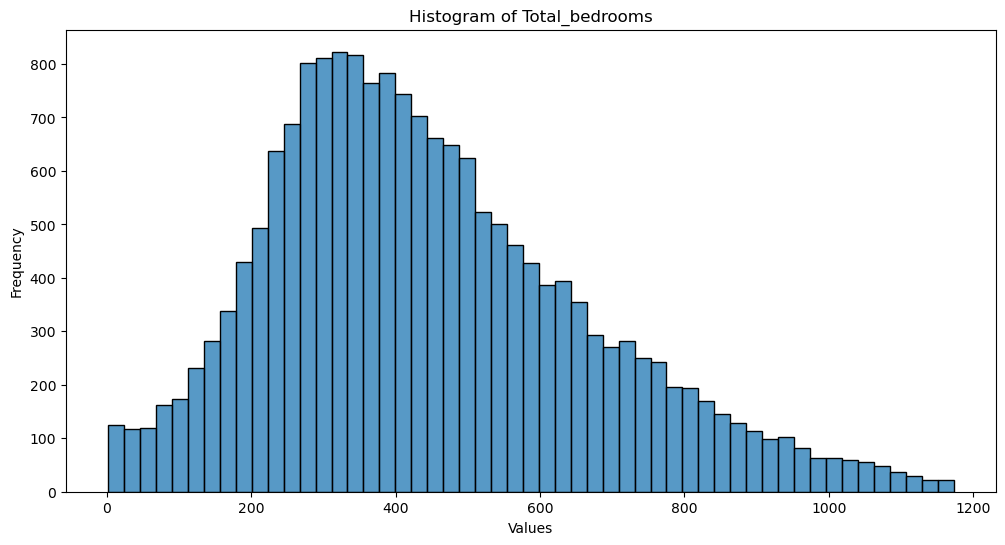

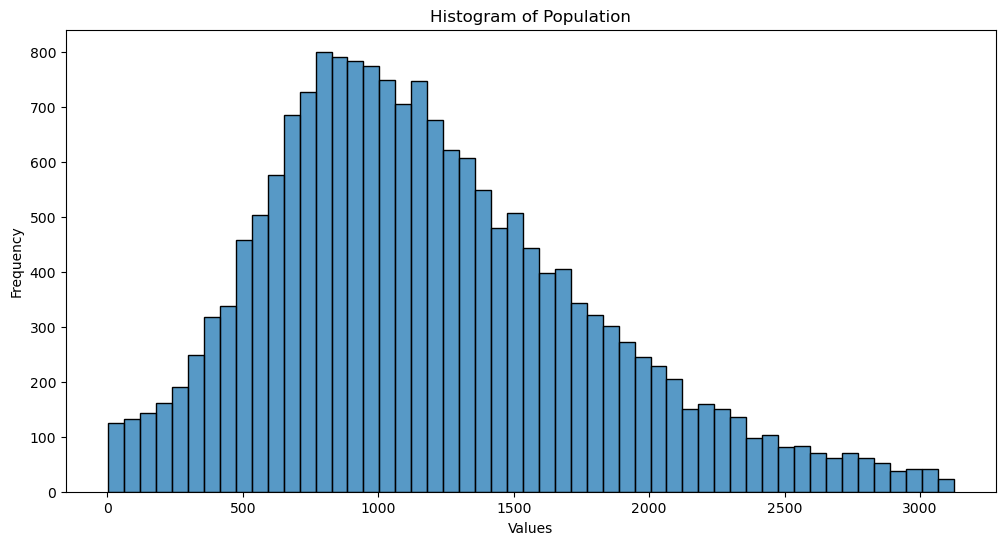

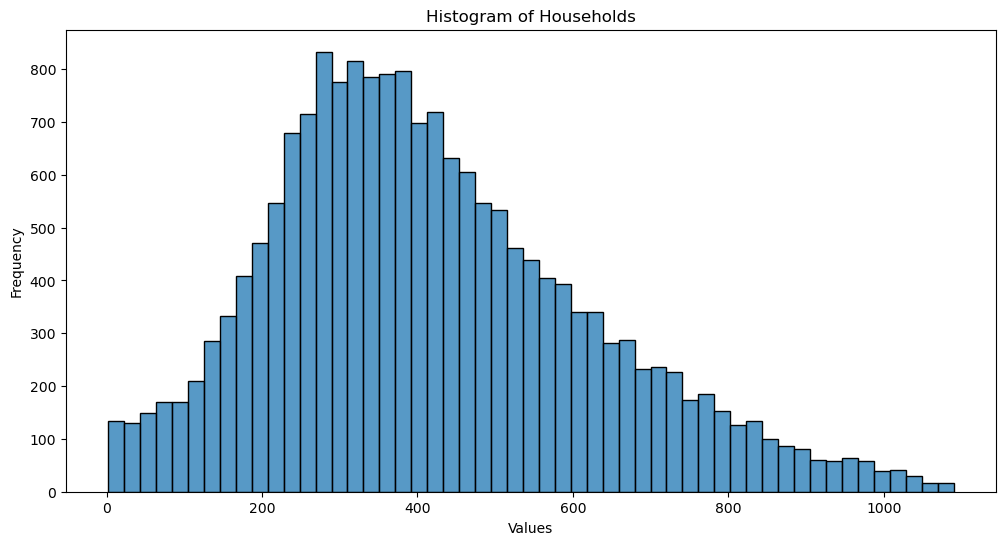

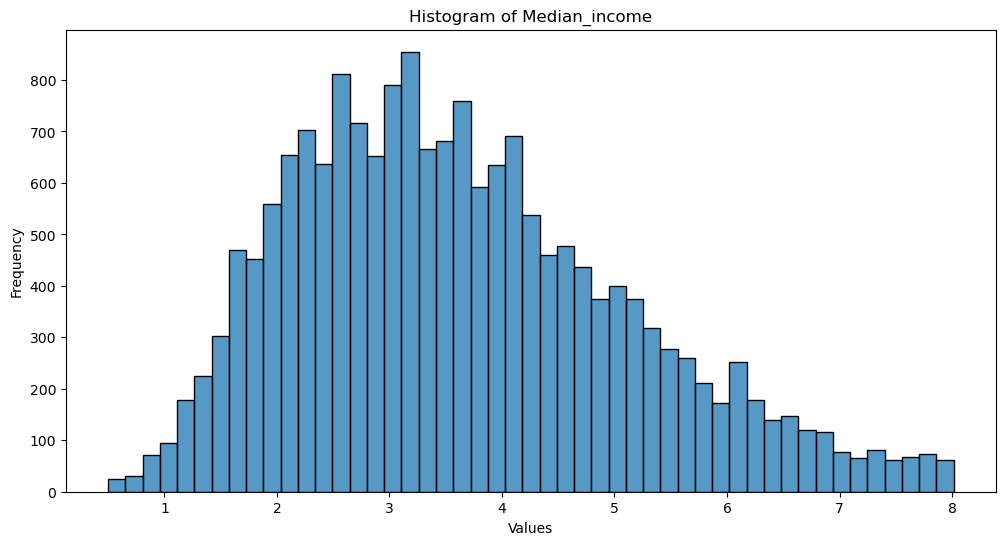

In [13]:
# Remove outliers from the original dataset
outlier_removed_df = housing_df.copy()

for feature in numerical_features:
    outliers = outlier_info[outlier_info['Feature'] == feature]['Outliers'].values[0]
    outlier_removed_df = outlier_removed_df[~outlier_removed_df[feature].isin(outliers)]

# Create a checkpoint for the dataset after outlier removal
checkpoint(outlier_removed_df, 'outlier_removed')
plot_distribution(outlier_removed_df)

### After outlier removal

- After the outlier removal most of the data distribution can be seen clearly. They are still right skewed but their tail seems to shortened.

Checkpoint 'mean_imputed' created.


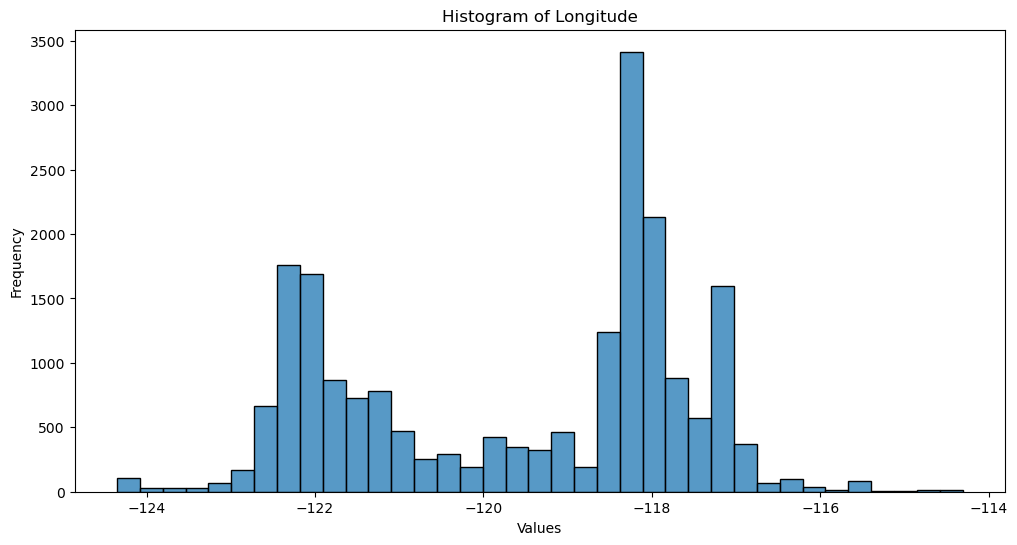

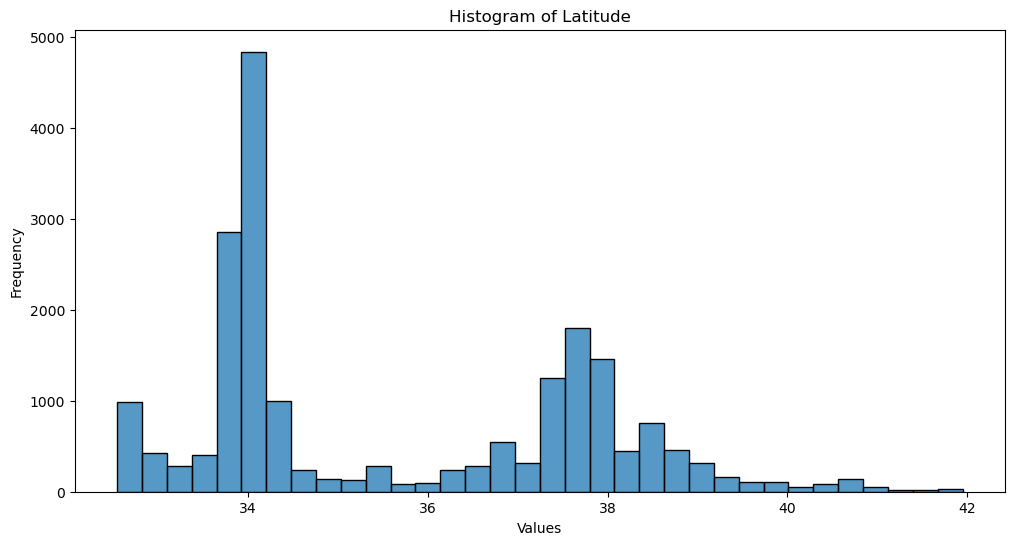

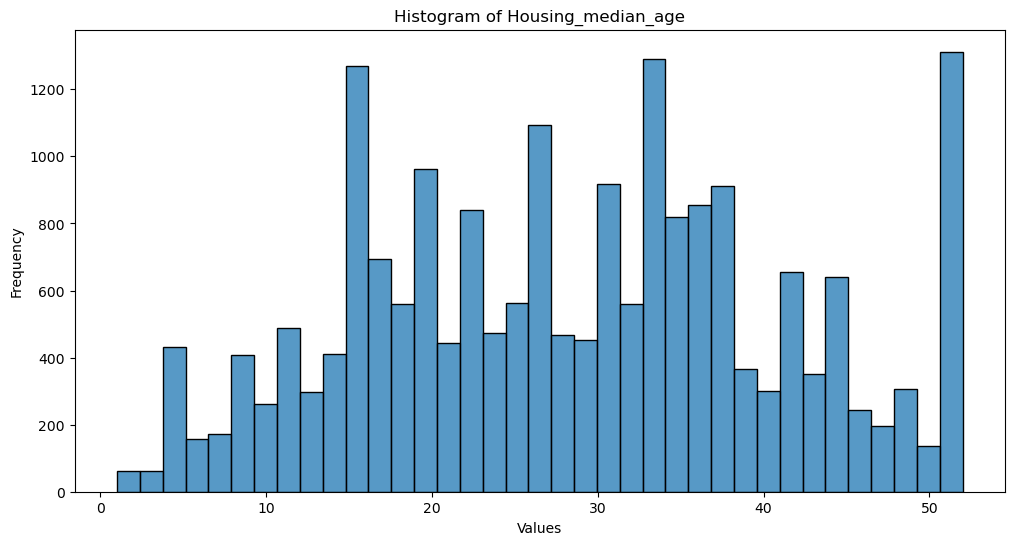

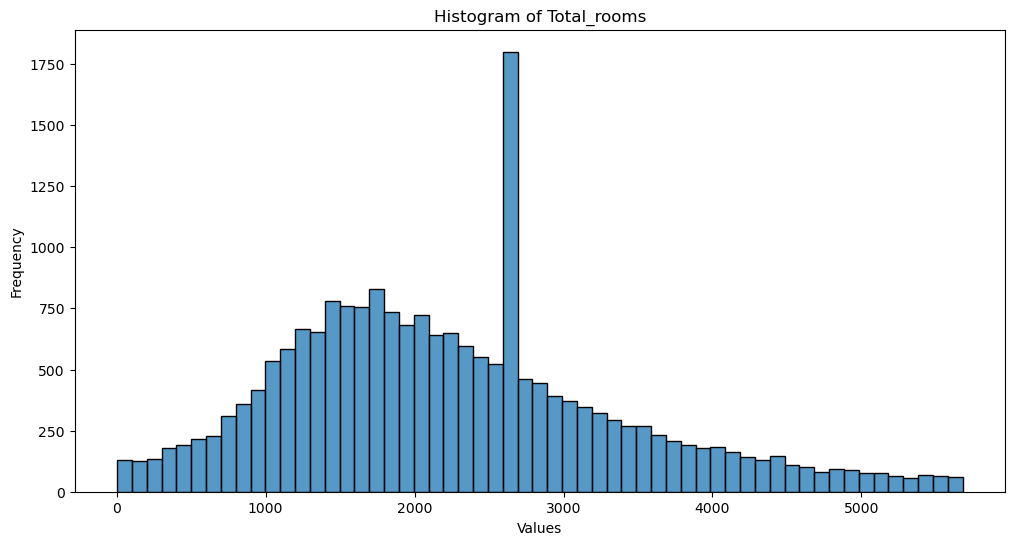

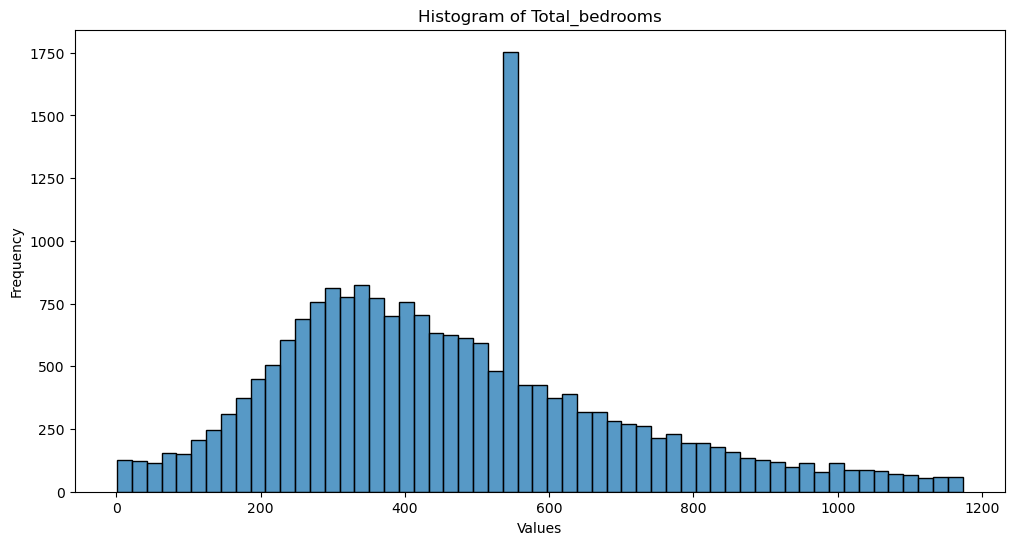

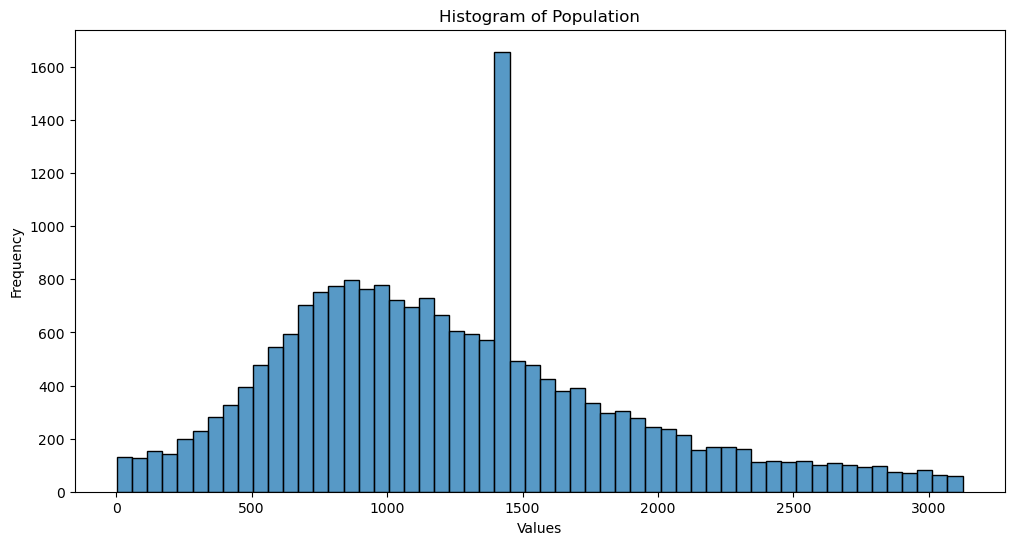

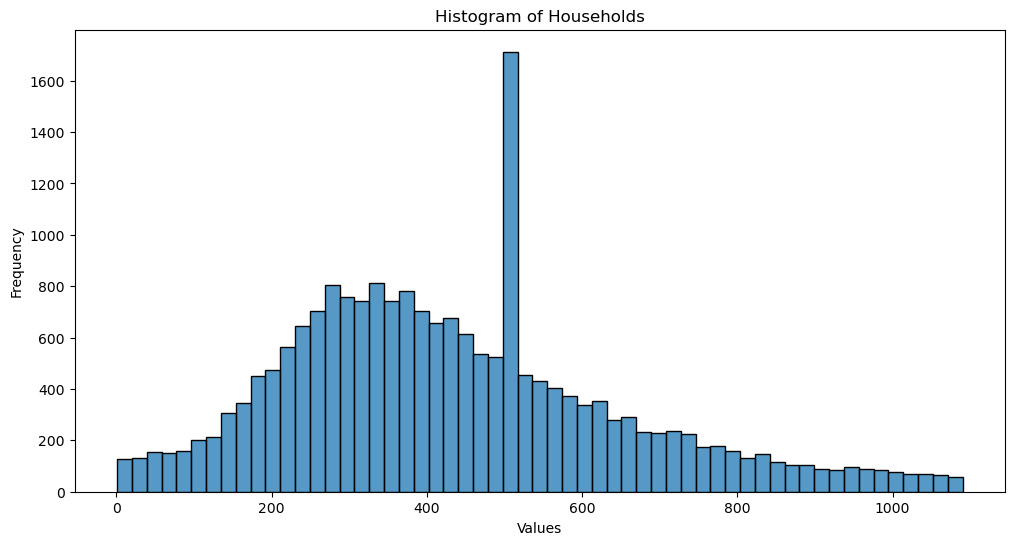

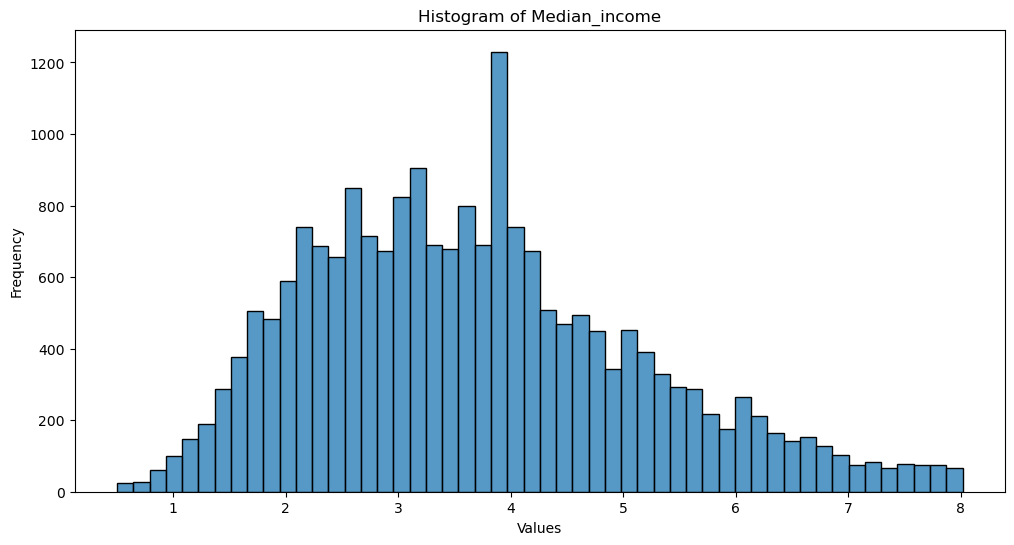

In [14]:
# Mean imputation for outliers
mean_imputed_df = housing_df.copy()

for feature in numerical_features:
    outliers = outlier_info[outlier_info['Feature'] == feature]['Outliers'].values[0]
    mean_value = mean_imputed_df[feature].mean()
    mean_imputed_df.loc[mean_imputed_df[feature].isin(outliers), feature] = mean_value

# Create a checkpoint for the dataset after mean imputation
checkpoint(mean_imputed_df, 'mean_imputed')
plot_distribution(mean_imputed_df)

### After mean imputed

- After the mean imputation a peak occured at the mean value of most data distribution. This happened due to replacing the outliers with the mean.

Checkpoint 'median_imputed' created.


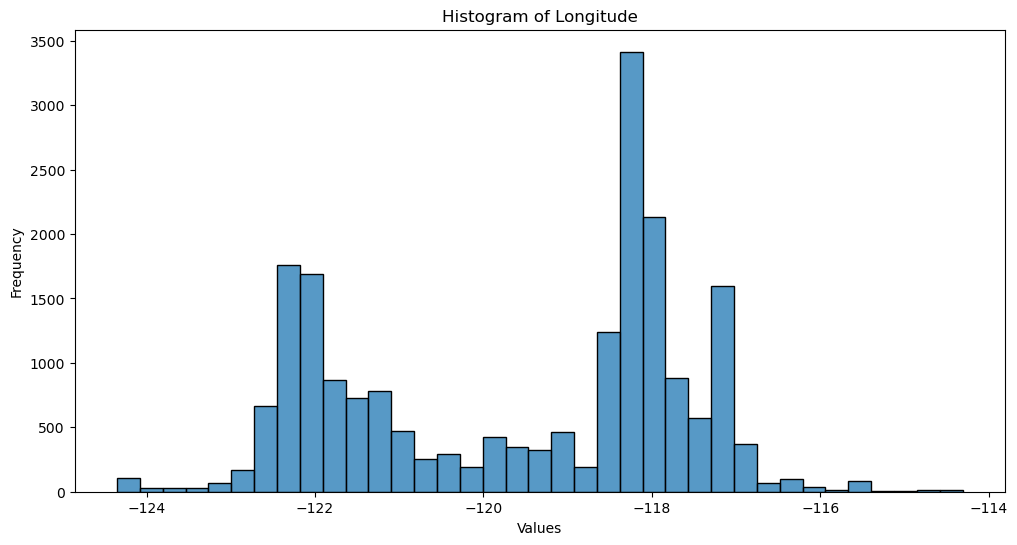

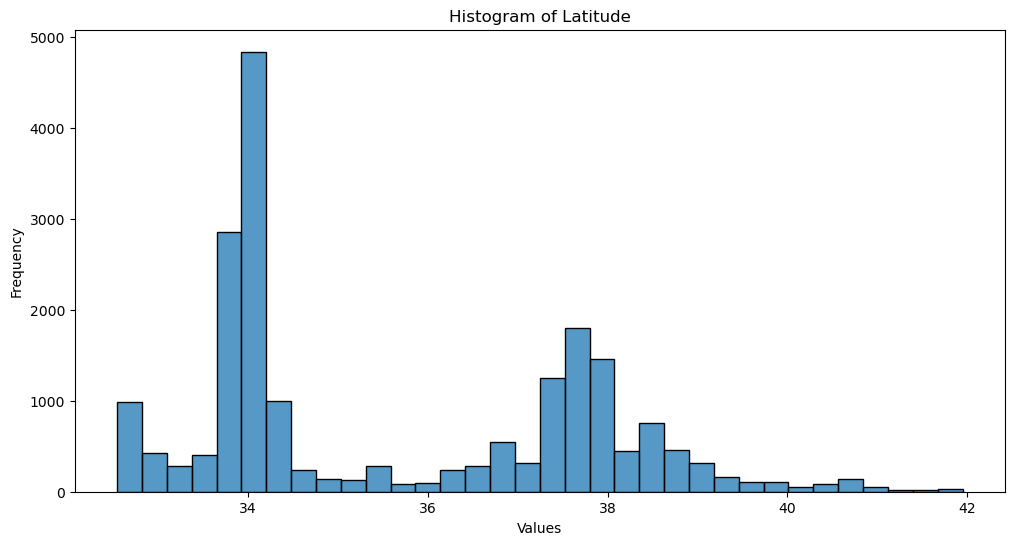

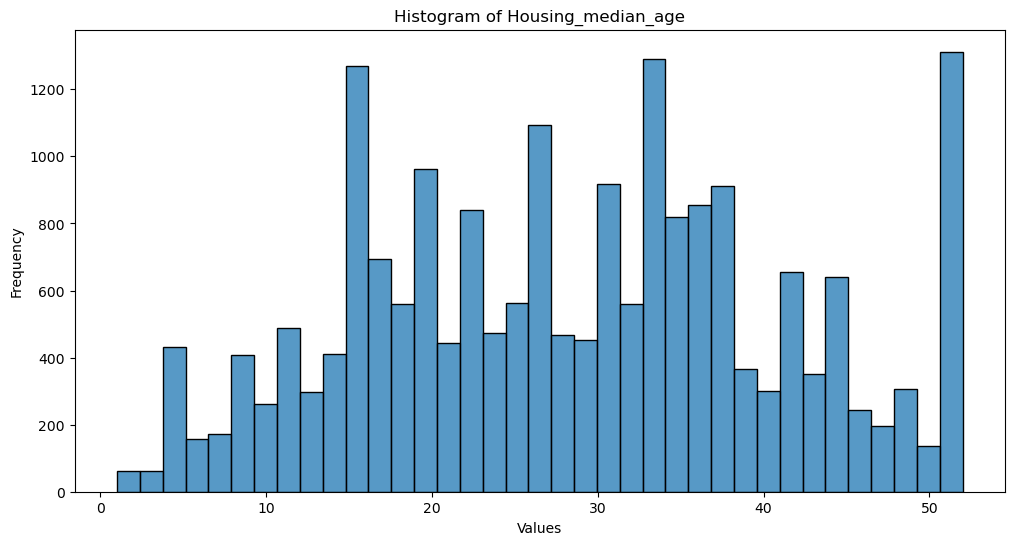

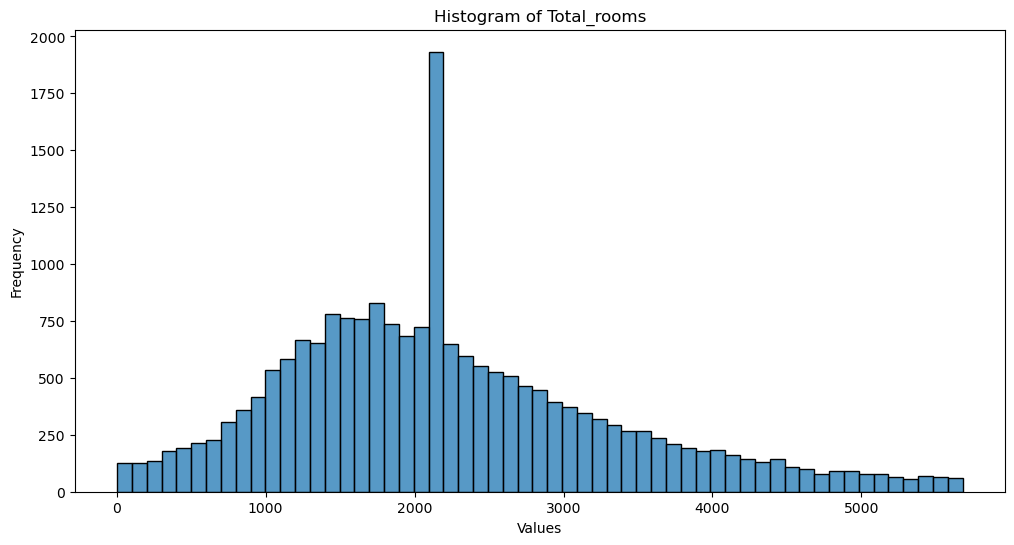

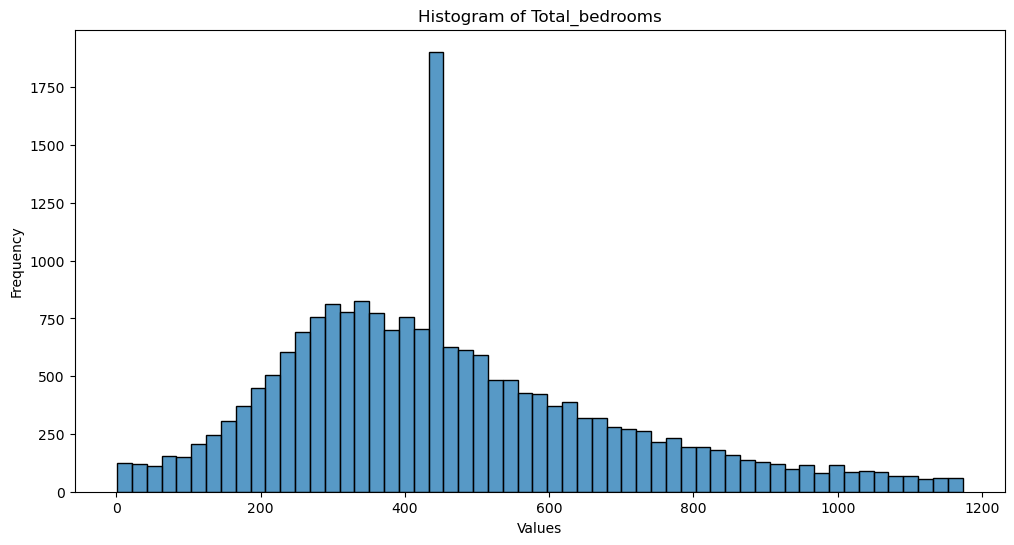

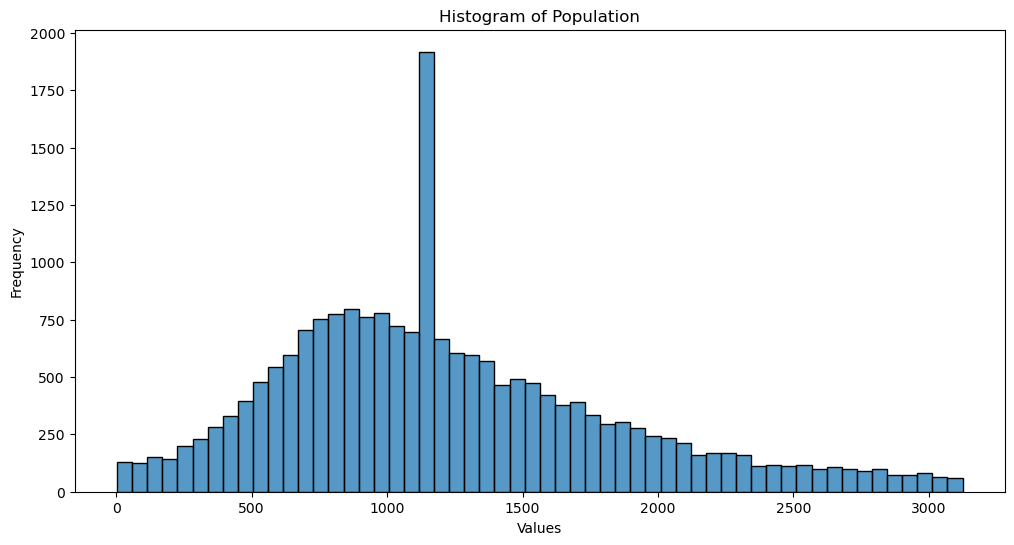

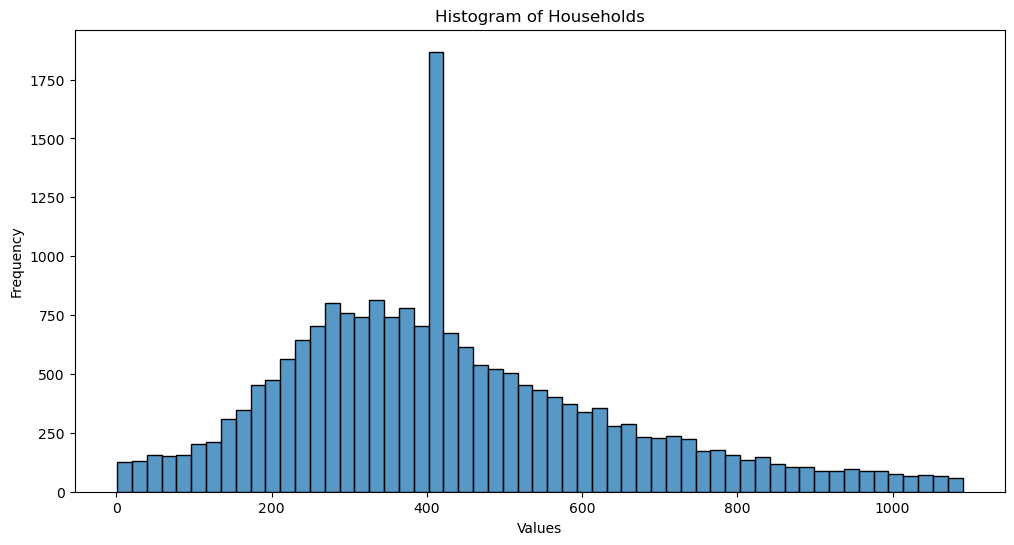

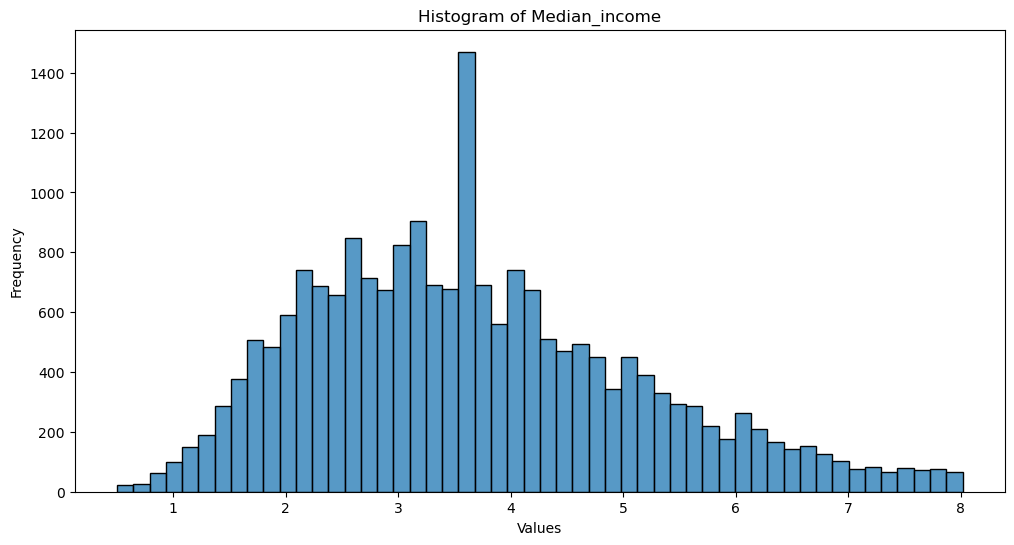

In [15]:
# Median imputation for outliers
median_imputed_df = housing_df.copy()

for feature in numerical_features:
    outliers = outlier_info[outlier_info['Feature'] == feature]['Outliers'].values[0]
    median_value = median_imputed_df[feature].median()
    median_imputed_df.loc[median_imputed_df[feature].isin(outliers), feature] = median_value

# Create a checkpoint for the dataset after median imputation
checkpoint(median_imputed_df, 'median_imputed')
plot_distribution(median_imputed_df)

### After the median imputated

- After the median imputation a peak occured at the median value of most data distribution. This happened due to replacing outliers with the median.

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [16]:
original = pd.read_csv('original.csv')
outlier_removed = pd.read_csv('outlier_removed.csv')
mean_imputed = pd.read_csv('mean_imputed.csv')
median_imputed = pd.read_csv('median_imputed.csv')
original['ocean_proximity_encoded'] = OrdinalEncoder(categories=[['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']]).fit_transform(original[['ocean_proximity']])
outlier_removed['ocean_proximity_encoded'] = OrdinalEncoder(categories=[['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']]).fit_transform(outlier_removed[['ocean_proximity']])
mean_imputed['ocean_proximity_encoded'] = OrdinalEncoder(categories=[['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']]).fit_transform(mean_imputed[['ocean_proximity']])
median_imputed['ocean_proximity_encoded'] = OrdinalEncoder(categories=[['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']]).fit_transform(median_imputed[['ocean_proximity']])
original.drop('ocean_proximity', axis=1, inplace=True)
outlier_removed.drop('ocean_proximity', axis=1, inplace=True)
mean_imputed.drop('ocean_proximity', axis=1, inplace=True)
median_imputed.drop('ocean_proximity', axis=1, inplace=True)

## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In [17]:
def shuffle_and_split(data, train_ratio=0.7):
    # Shuffle the DataFrame
    shuffled_data = data.sample(frac=1, random_state=20).reset_index(drop=True)
    
    # Calculate the number of rows for training set
    train_size = int(train_ratio * len(shuffled_data))
    
    # Split the dataset into training and testing sets
    train_set = shuffled_data[:train_size]
    test_set = shuffled_data[train_size:]
    
    return train_set, test_set
original_train, original_test = shuffle_and_split(original)
outlier_removed_train, outlier_removed_test = shuffle_and_split(outlier_removed)
mean_imputed_train, mean_imputed_test = shuffle_and_split(mean_imputed)
median_imputed_train, median_imputed_test = shuffle_and_split(median_imputed)

# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

kNN Regression for original data set:


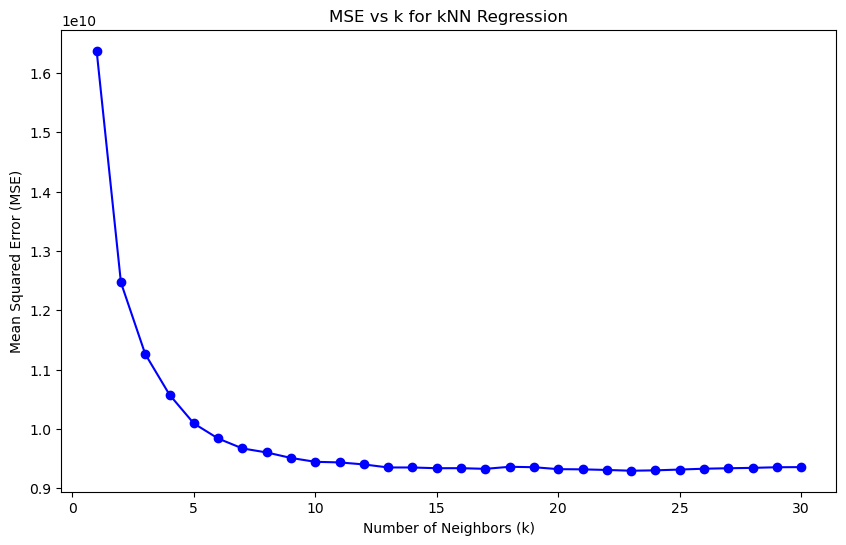

Optimal k: 23
R-squared for optimal k: 0.29798037716800496
MSE for optimal k: 9295778925.906643
---------------------------------------------

kNN Regression for outlier_removed data set:


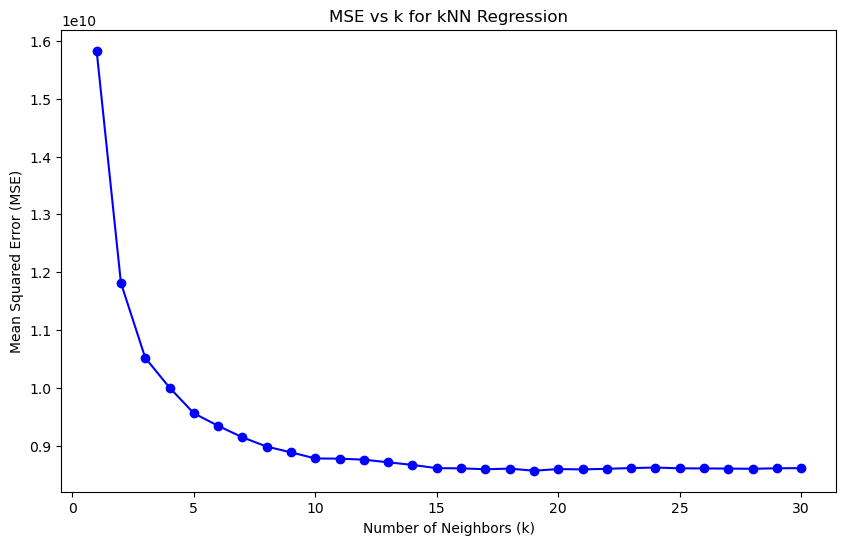

Optimal k: 19
R-squared for optimal k: 0.2372091229755875
MSE for optimal k: 8565436141.227639
---------------------------------------------

kNN Regression for mean_imputed data set:


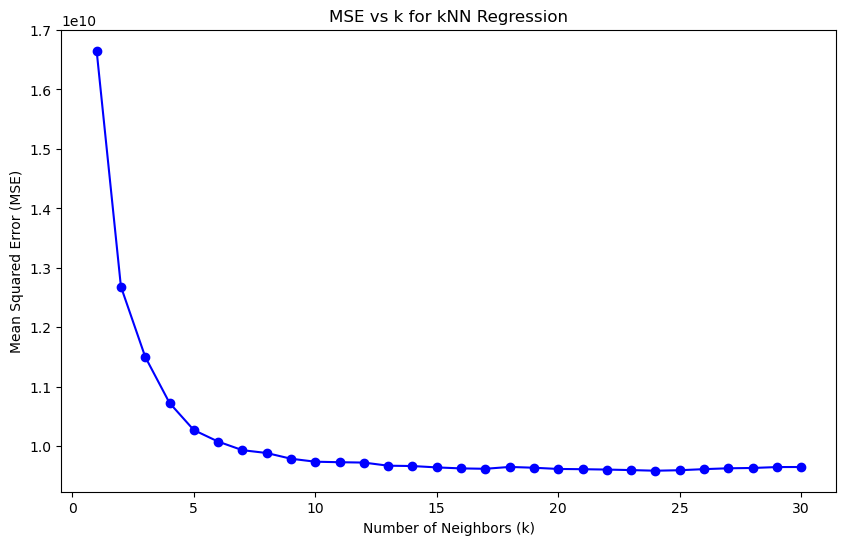

Optimal k: 24
R-squared for optimal k: 0.27578020890146826
MSE for optimal k: 9589742014.133654
---------------------------------------------

kNN Regression for median_imputed data set:


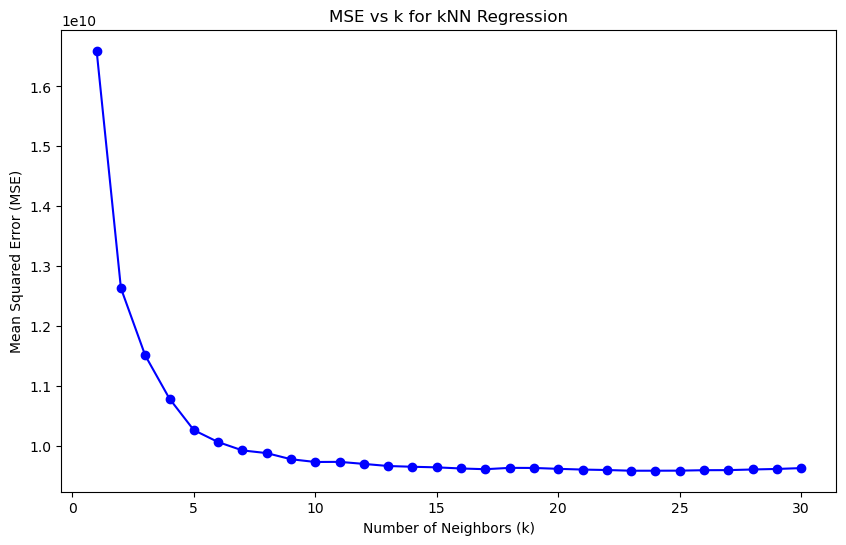

Optimal k: 23
R-squared for optimal k: 0.27572507690288695
MSE for optimal k: 9590472043.400482
---------------------------------------------



In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def knn_regression_analysis(train_data, test_data, max_neighbors=30):
    X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']
    X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']
    
    mse_values = []
    r2_values = []
    
    for k in range(1, max_neighbors+1):
        knn_model = KNeighborsRegressor(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        mse_values.append(mse)
        r2_values.append(r2)
    
    # Find the optimal k based on minimum MSE
    optimal_k = np.argmin(mse_values) + 1
    optimal_r2 = r2_values[optimal_k - 1]
    
    # Plot MSE vs k
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_neighbors+1), mse_values, marker='o', linestyle='-', color='b')
    plt.title('MSE vs k for kNN Regression')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.show()
    
    # Display the results
    print("Optimal k:", optimal_k)
    print("R-squared for optimal k:", optimal_r2)
    print("MSE for optimal k:", mse_values[optimal_k - 1])
    
print("kNN Regression for original data set:")
knn_regression_analysis(original_train, original_test)
print("---------------------------------------------")
print()
print("kNN Regression for outlier_removed data set:")
knn_regression_analysis(outlier_removed_train, outlier_removed_test)
print("---------------------------------------------")
print()
print("kNN Regression for mean_imputed data set:")
knn_regression_analysis(mean_imputed_train, mean_imputed_test)
print("---------------------------------------------")
print()
print("kNN Regression for median_imputed data set:")
knn_regression_analysis(median_imputed_train, median_imputed_test)
print("---------------------------------------------")
print()

### Comments:
- The dataset with outliers removed has the lowest MSE among the three processed datasets, indicating that removing outliers improved the performance of the kNN regression model in terms of mean squared error.
- Outliers can have a significant impact on the performance of kNN regression. Removing them might result in a more accurate model since kNN is sensitive to the local distribution of data points.

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

In [19]:
from sklearn.linear_model import LinearRegression

def linear_regression_analysis(train_data, test_data):
    X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']
    X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Display the result
    print("\nLinear Regression:")
    print("MSE:", mse)
linear_regression_analysis(original_train, original_test)
linear_regression_analysis(outlier_removed_train, outlier_removed_test)
linear_regression_analysis(mean_imputed_train, mean_imputed_test)
linear_regression_analysis(median_imputed_train, median_imputed_test)


Linear Regression:
MSE: 4842625712.763829

Linear Regression:
MSE: 4280135240.975751

Linear Regression:
MSE: 6588036756.187882

Linear Regression:
MSE: 6847667068.364053


### Comments:

- The linear regression model performs the best on the dataset where outliers are removed, as it has the lowest MSE. This suggests that removing outliers has a positive impact on the linear regression model's performance in terms of mean squared error.
- Removing outliers appears to have a positive effect on the linear regression model's performance, resulting in lower MSE.


## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

**1. Original Dataset**:

-**kNN**:
- Optimal k: 23
- R-squared for optimal k: 0.29798037716800496
- MSE for optimal k: 9295778925.906643

**Linear Regression**:
- MSE: 4842625712.763829

**------------------------------------------------**

**2. Outlier Removed Dataset**:

-**kNN**:
- Optimal k: 19
- R-squared for optimal k: 0.2372091229755875
- MSE for optimal k: 8565436141.227639

-**Linear Regression**:
- MSE: 4280135240.975751

**------------------------------------------------**

**3. Mean Imputed Dataset**:

-**kNN**:
- Optimal k: 24
- R-squared for optimal k: 0.27578020890146826
- MSE for optimal k: 9589742014.133654

-**Linear Regression**:
- MSE: 6588036756.187882

**------------------------------------------------**

**4. Median Imputed Dataset**:

-**kNN**:
- Optimal k: 23
- R-squared for optimal k: 0.27572507690288695
- MSE for optimal k: 9590472043.400482

-**Linear Regression**:
- MSE: 6847667068.364053

**------------------------------------------------**

### Comparison:

##### Strengths and Limitations of kNN:

**Strengths:**
- Non-parametric and can capture complex relationships in data.
- Effective when the underlying patterns are not well-defined or linear.
- No assumption about the distribution of data.

**Limitations:**
- Sensitive to outliers and noise.
- Computationally expensive, especially with large datasets.
- The optimal choice of k is crucial and might vary for different datasets.
- Performance highly dependent on the distance metric used.

##### Strengths and Limitations of Linear Regression:

**Strengths:**
- Simple and interpretable model.
- Fast training and prediction.
- Effective when the relationship between features and target is approximately linear.

**Limitations:**
- Assumes a linear relationship, which might not capture complex patterns.
- Sensitive to outliers.
- Limited ability to handle non-linear relationships.
- Assumption of independence and homoscedasticity of residuals.

##### Overall Comparison:

- Linear Regression generally outperforms kNN in terms of MSE across the different datasets in this specific scenario.
- kNN tends to struggle with the presence of outliers and noise, evident from its higher MSE values compared to Linear Regression, especially when outliers are present or when imputation methods are used.
- Linear Regression's simplicity and speed make it more suitable when the underlying relationship is approximately linear and the assumptions hold.
- kNN can be a better choice when the relationships are non-linear, and there's a need for a more flexible, data-driven approach.

## Overall both kNN and Linear Regression performed best with the outlier_removed data compared to others. This indicates original data has a high percentage of outliers hence effecting the models cruically and directly removing them is the best option particularly for this data set.**


# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices